In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_znorm_rolling_avg_std_window_129_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

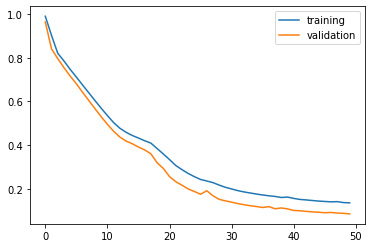

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [0 2 1]
group_bunches: [1286. 3375. 2029.]
group_bunches sorted: [1286. 2029. 3375.]
restore_index: [0 2 1]
group_bunches restored: [1286. 3375. 2029.]

50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
585   Inst  6429     1     h  7 2017-11-28 03:16:13   
890   Inst  7491     1     h  7 2018-12-02 11:34:15   
7130  Inst  6807     1     h  7 2018-06-16 03:38:15   
6539  Inst  6924     1     h  7 2018-07-15 08:18:14   
2465  Inst  7483     1     h  7 2018-11-29 05:22:15   

                                                   file  n_bunches  \
585   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6429/...        332   
890   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7491/...        733   
7130  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6807/...        300   
6539  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6924/...       1068   
2465  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   

      bunch_index  bunch_number  ts_length  chunk  
585        1444.0         308.0      65536      2  
890        2734.0         574.0      65536      3  
7130        328.0         131.0      65536     27  
6539        502.0         356.0      65536     25  
2465       2824.0         528.0      65536      9

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 989ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  7433     1     h  7 2018-11-09 22:54:21   
1244  Inst  7407     1     h  7 2018-11-05 05:13:22   
5767  Inst  7346     1     h  7 2018-10-25 09:43:34   
7206  Inst  6692     1     h  7 2018-05-16 18:52:14   
7624  Inst  7433     1     h  7 2018-11-09 22:54:21   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7433/...        132   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7407/...         96   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...       2556   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6692/...       1551   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7433/...        132   

      bunch_index  bunch_number  ts_length  chunk  
4808        985.0          70.0      65536     18  
1244         51.0           2.0      65536      4  
5767        943.0         679.0      65536     22  
7206       1336.0         637.0      65536     28  
7624        985.0          70.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

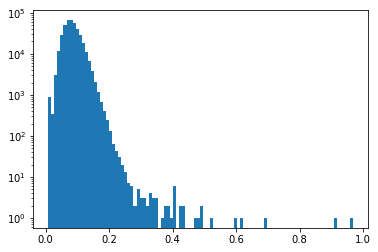

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

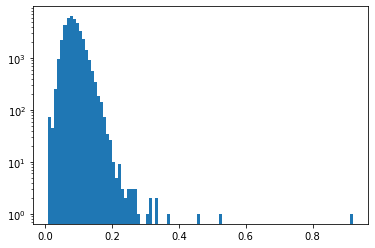

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.06359277683246793
type                                                         Inst
fill                                                         6429
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-28 03:16:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6429/...
n_bunches                                                     332
bunch_index                                                  1444
bunch_number                                                  308
ts_length                                                   65536
chunk                                                           2
Name: 585, dtype: object


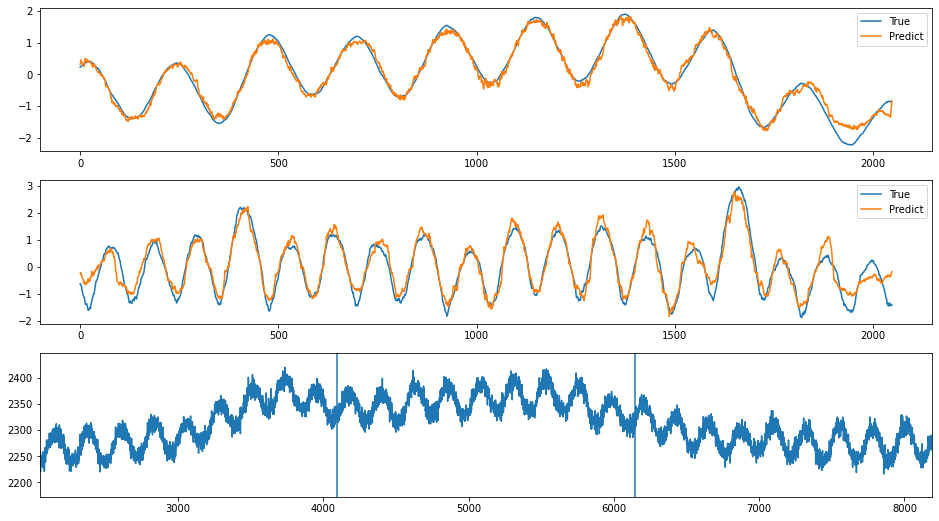

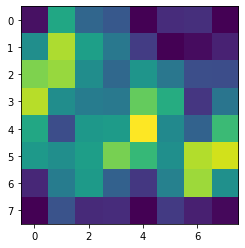

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 203164
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7238
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-30 11:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7238/...
n_bunches                                                     252
bunch_index                                                   959
bunch_number                                                  111
ts_length                                                   65536
chunk                                                          16
Name: 4329, dtype: object


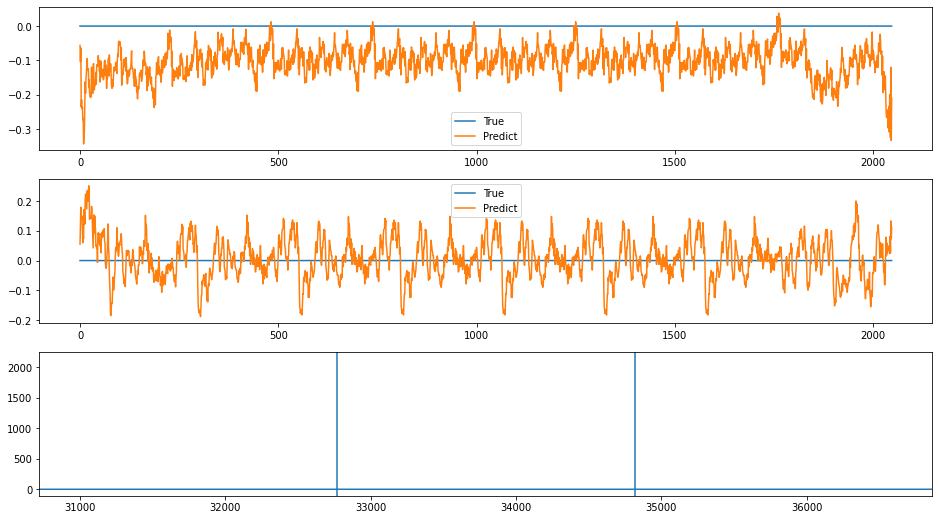

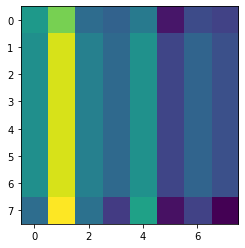

index: 359991
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7256
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-04 02:46:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7256/...
n_bunches                                                    1068
bunch_index                                                  1302
bunch_number                                                  948
ts_length                                                   65536
chunk                                                           6
Name: 1543, dtype: object


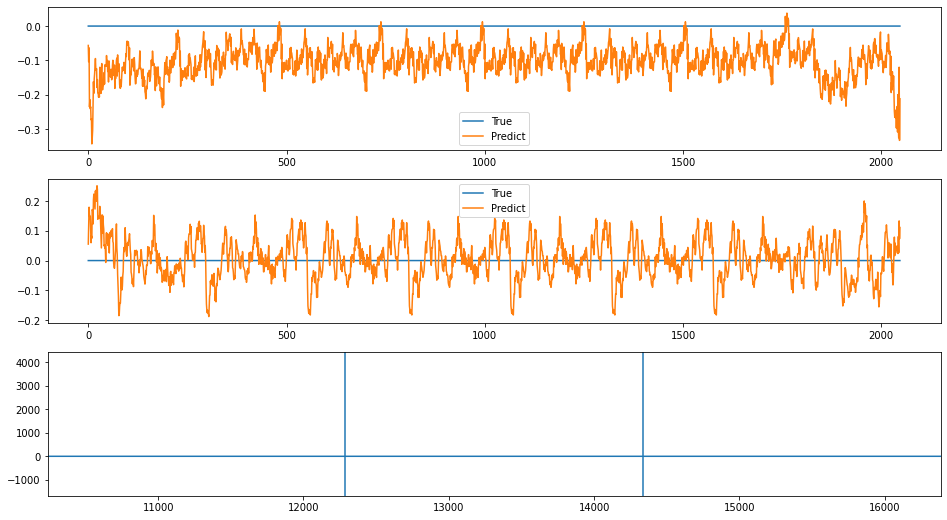

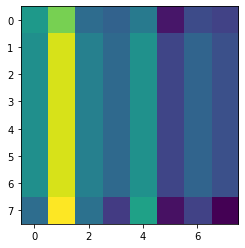

index: 191193
Error: 0.008605852057616985
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                   877
bunch_number                                                   82
ts_length                                                   65536
chunk                                                          12
Name: 3165, dtype: object


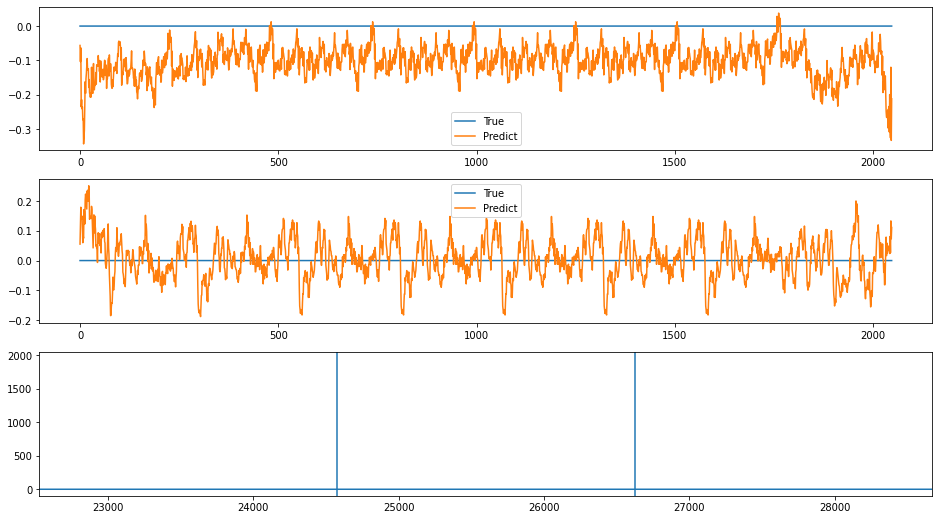

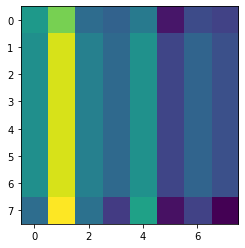

index: 240503
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7381
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:25:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7381/...
n_bunches                                                     156
bunch_index                                                   918
bunch_number                                                   30
ts_length                                                   65536
chunk                                                           1
Name: 274, dtype: object


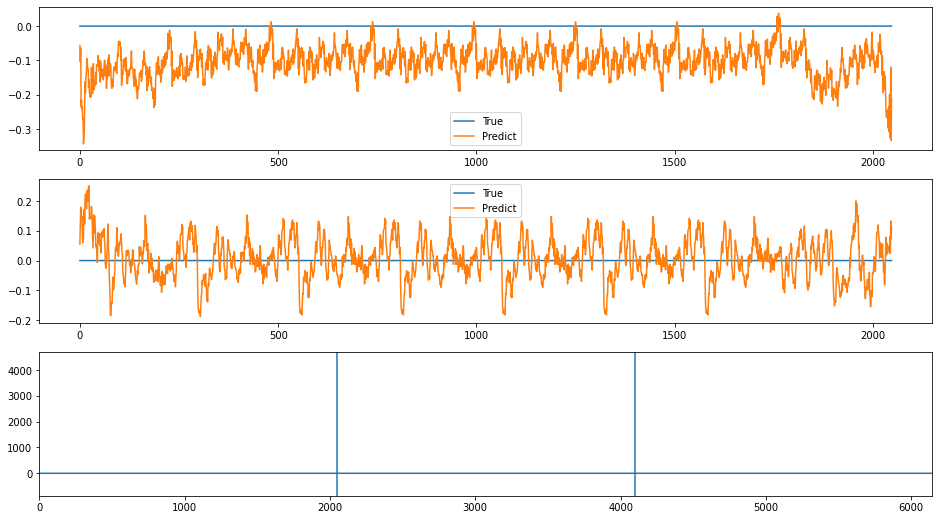

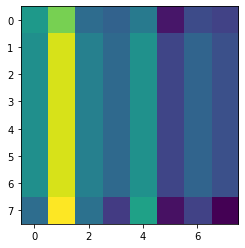

index: 106947
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7442
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-13 18:34:32
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7442/...
n_bunches                                                     104
bunch_index                                                   483
bunch_number                                                   88
ts_length                                                   65536
chunk                                                           0
Name: 79, dtype: object


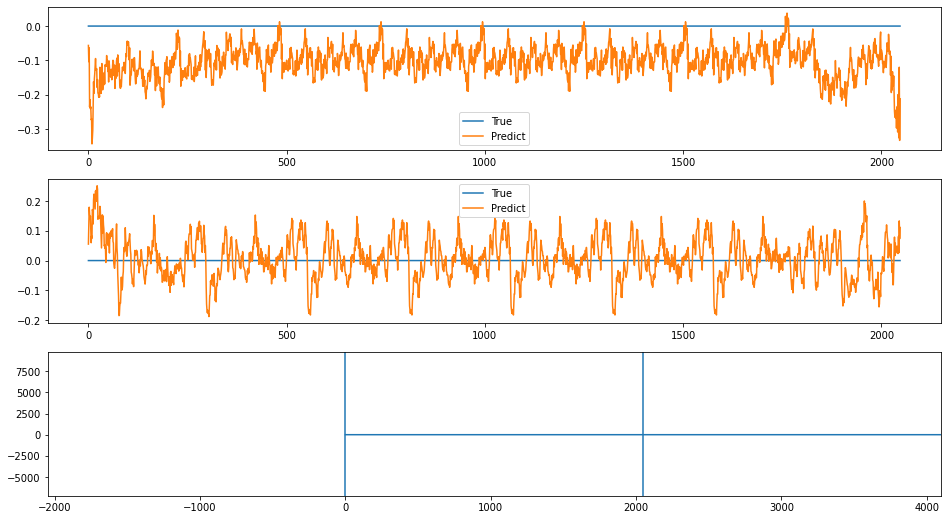

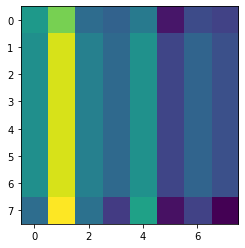

index: 374832
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7333
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 22:10:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7333/...
n_bunches                                                     540
bunch_index                                                   607
bunch_number                                                  430
ts_length                                                   65536
chunk                                                           1
Name: 262, dtype: object


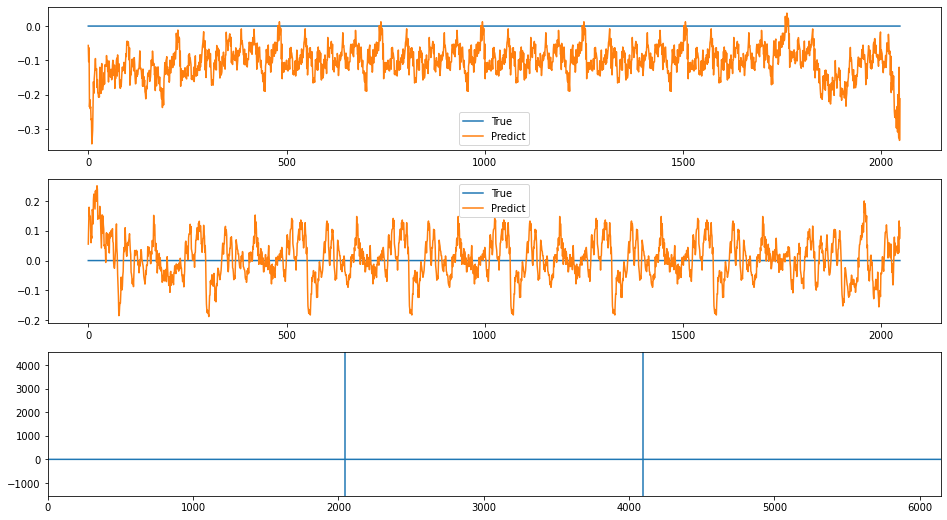

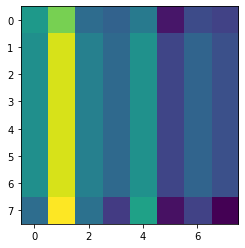

index: 272770
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7446
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-15 19:17:04
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7446/...
n_bunches                                                     576
bunch_index                                                  2948
bunch_number                                                  550
ts_length                                                   65536
chunk                                                           1
Name: 434, dtype: object


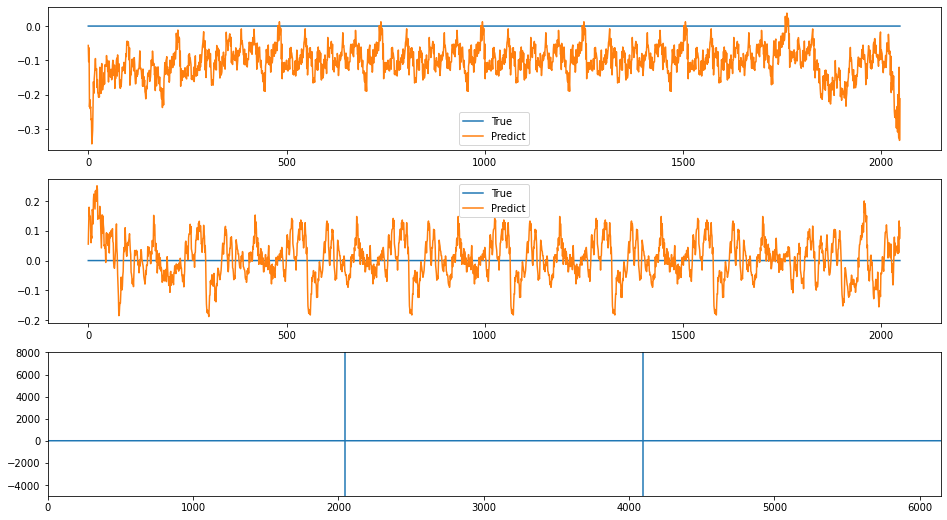

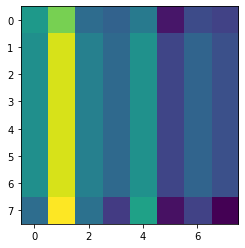

index: 180950
Error: 0.008605852057616985
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:13:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     180
bunch_index                                                   266
bunch_number                                                  138
ts_length                                                   65536
chunk                                                          13
Name: 3551, dtype: object


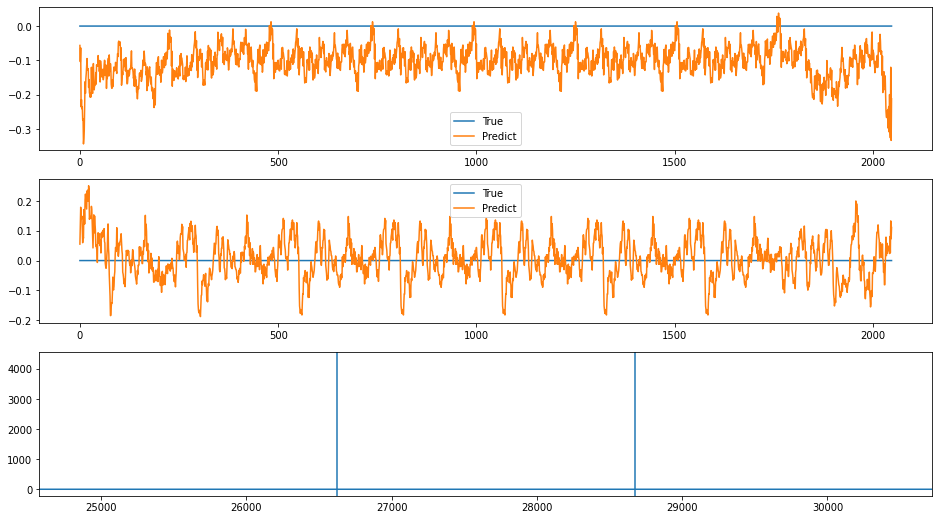

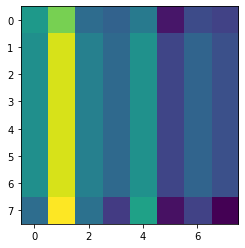

index: 254499
Error: 0.008605852057616985
type                                                         Inst
fill                                                         7045
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-11 23:21:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7045/...
n_bunches                                                     924
bunch_index                                                  1213
bunch_number                                                  890
ts_length                                                   65536
chunk                                                           4
Name: 1262, dtype: object


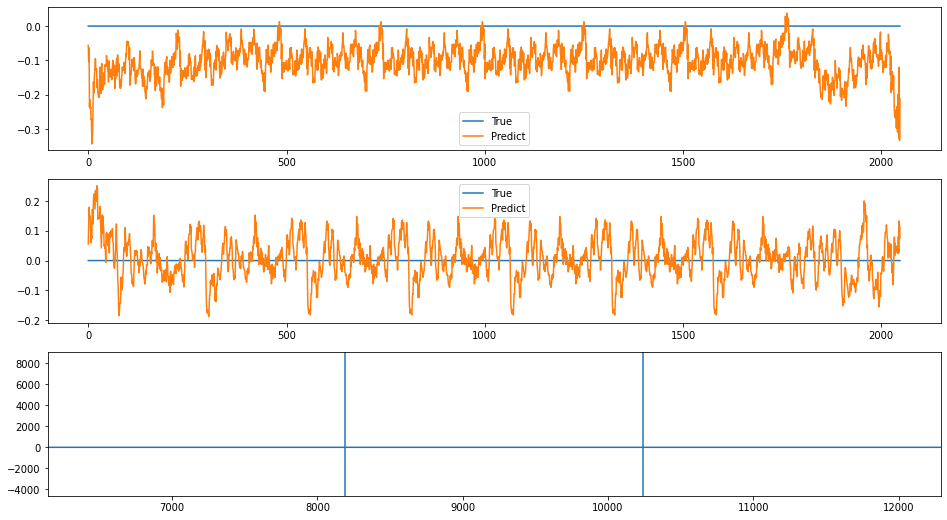

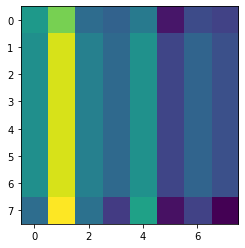

index: 183732
Error: 0.008605852057616985
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 05:56:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                     180
bunch_index                                                   274
bunch_number                                                  142
ts_length                                                   65536
chunk                                                           1
Name: 339, dtype: object


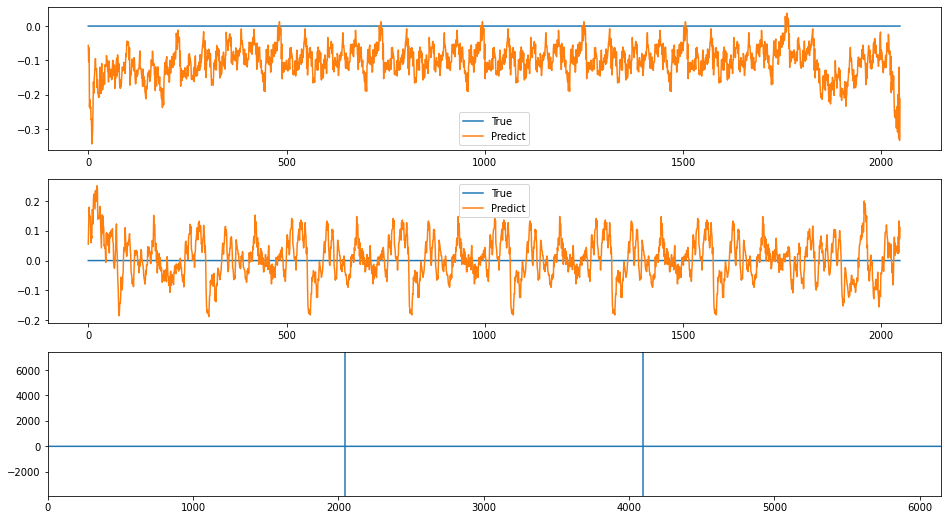

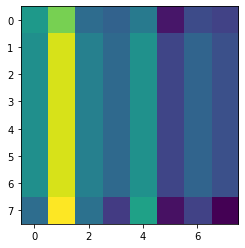

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 144647
Error: 0.9669860265646901
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:03:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     572
bunch_index                                                   923
bunch_number                                                  498
ts_length                                                   65536
chunk                                                           3
Name: 990, dtype: object


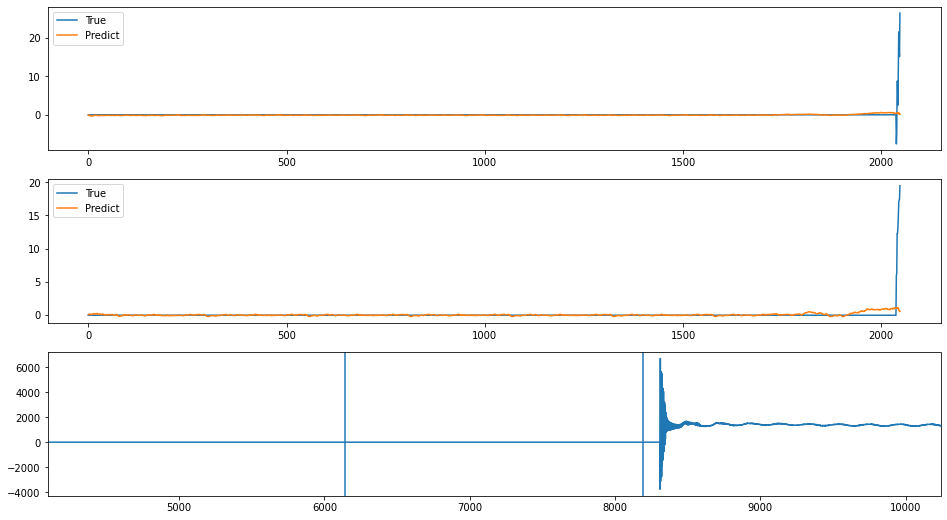

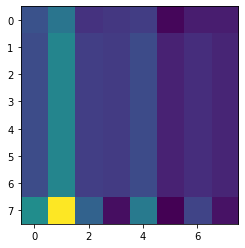

index: 205071
Error: 0.9186555127639312
type                                                         Inst
fill                                                         6355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 18:19:12
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...
n_bunches                                                     524
bunch_index                                                   878
bunch_number                                                  462
ts_length                                                   65536
chunk                                                           5
Name: 1322, dtype: object


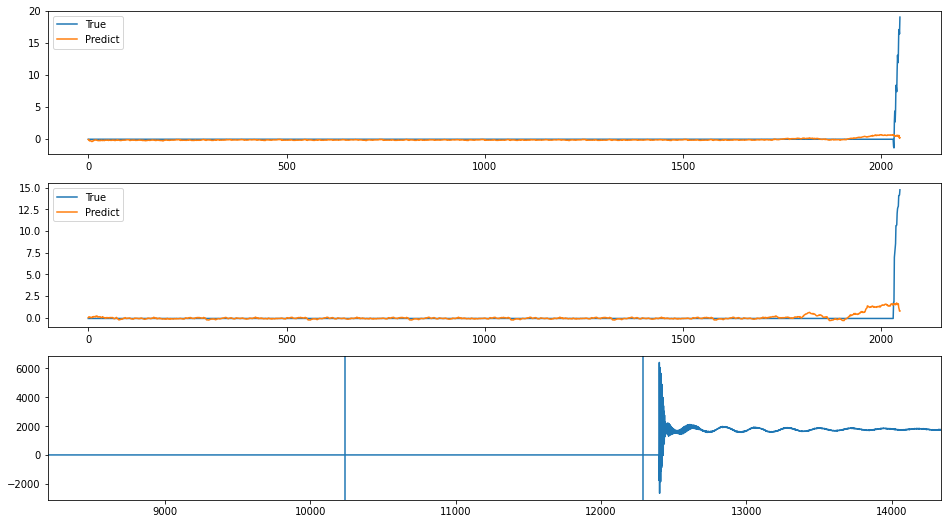

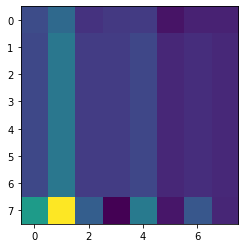

index: 211119
Error: 0.692706291708357
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:53:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     652
bunch_index                                                  1195
bunch_number                                                  648
ts_length                                                   65536
chunk                                                           5
Name: 1339, dtype: object


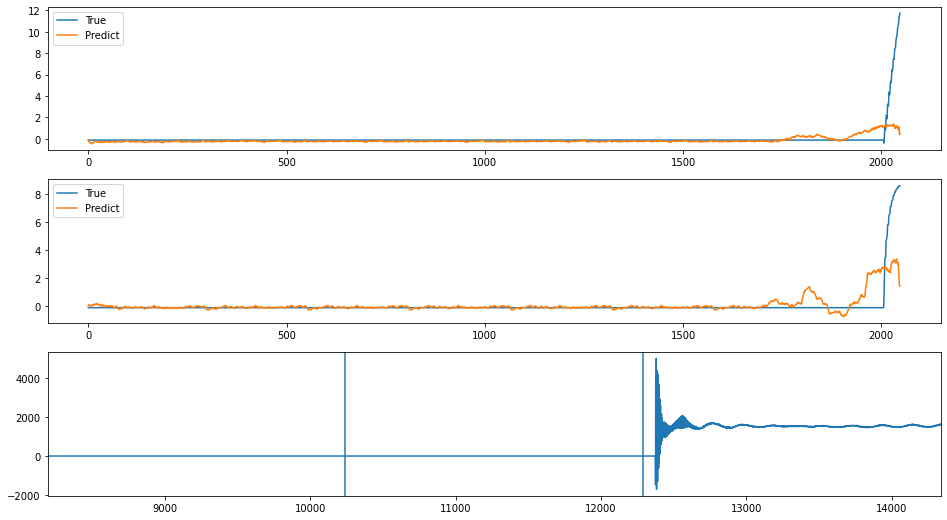

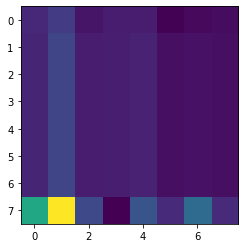

index: 386059
Error: 0.6140852420853803
type                                                         Inst
fill                                                         6755
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-03 17:29:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6755/...
n_bunches                                                     924
bunch_index                                                  1218
bunch_number                                                  876
ts_length                                                   65536
chunk                                                          10
Name: 2685, dtype: object


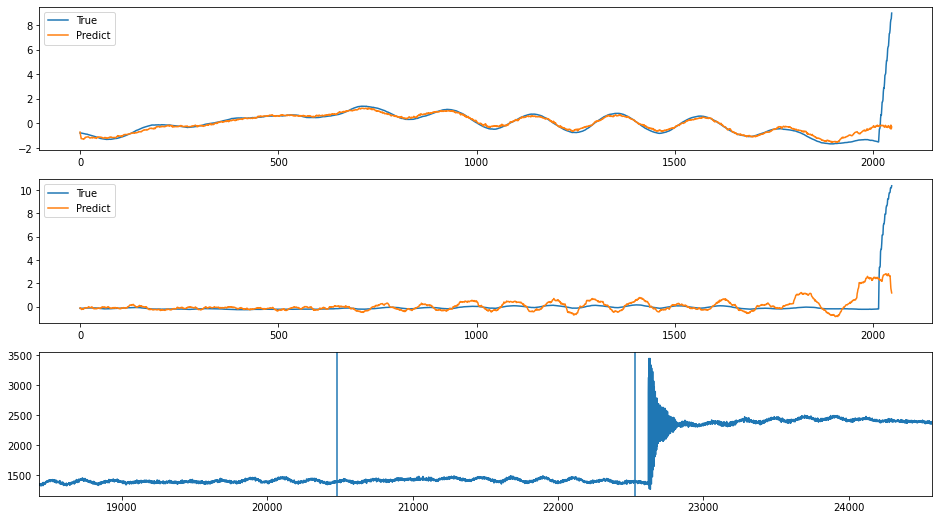

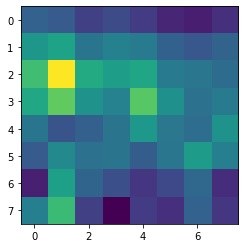

index: 121042
Error: 0.6006085368223444
type                                                         Inst
fill                                                         6921
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 14:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6921/...
n_bunches                                                     252
bunch_index                                                   218
bunch_number                                                  131
ts_length                                                   65536
chunk                                                           6
Name: 1701, dtype: object


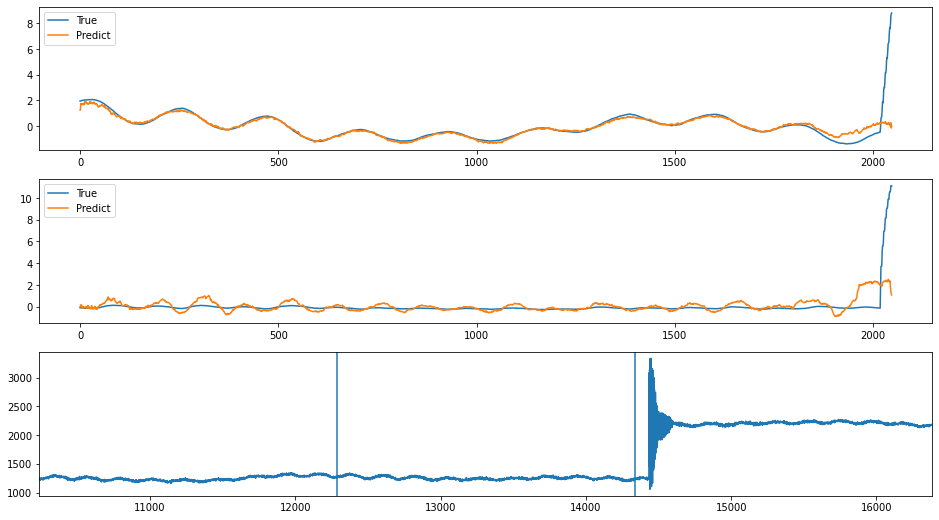

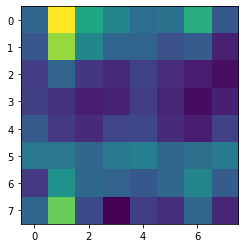

index: 262832
Error: 0.5220959513047203
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 12:48:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                      12
bunch_index                                                    15
bunch_number                                                    8
ts_length                                                   65536
chunk                                                           3
Name: 886, dtype: object


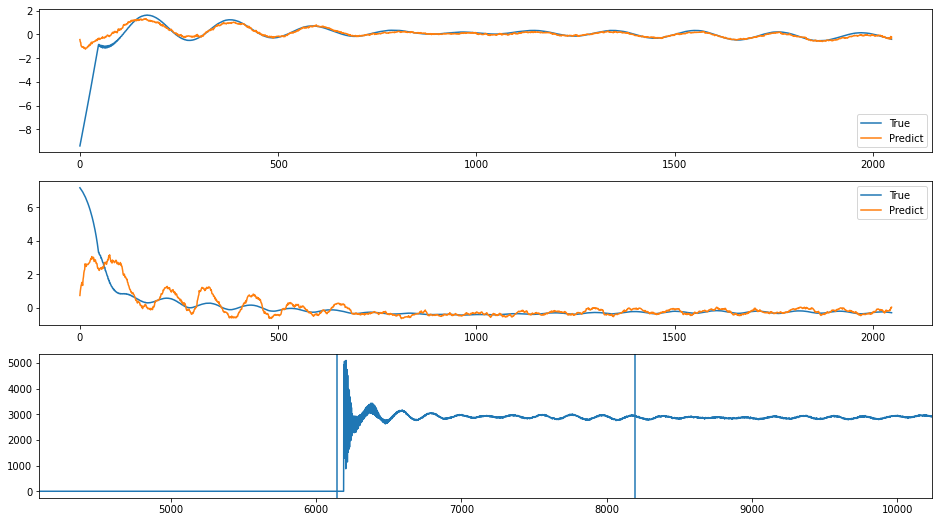

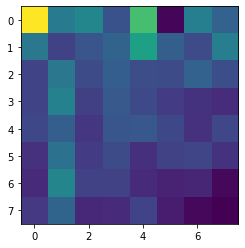

index: 101943
Error: 0.4920303446091796
type                                                         Inst
fill                                                         7097
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-28 14:19:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7097/...
n_bunches                                                     108
bunch_index                                                   104
bunch_number                                                   55
ts_length                                                   65536
chunk                                                           9
Name: 2310, dtype: object


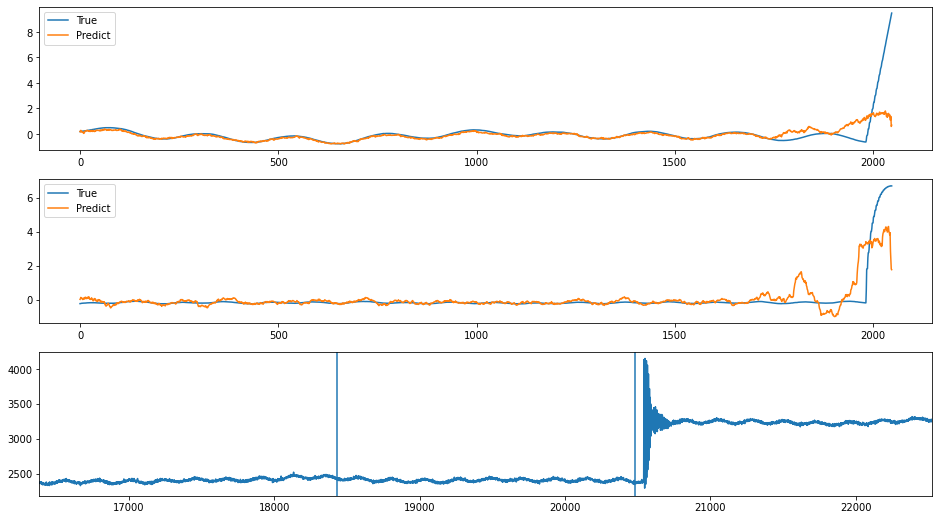

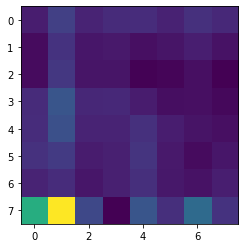

index: 65133
Error: 0.49177362742938036
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 18:19:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                     204
bunch_index                                                   382
bunch_number                                                  201
ts_length                                                   65536
chunk                                                           5
Name: 1286, dtype: object


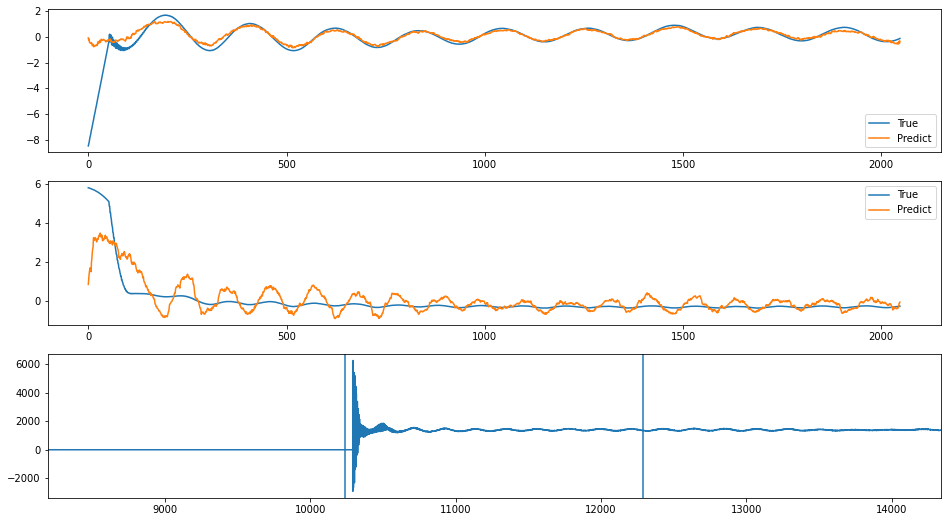

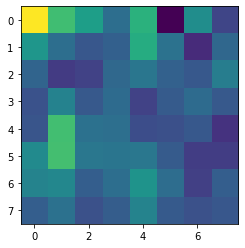

index: 350731
Error: 0.48303641512499945
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:43:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     780
bunch_index                                                   973
bunch_number                                                  702
ts_length                                                   65536
chunk                                                          11
Name: 2945, dtype: object


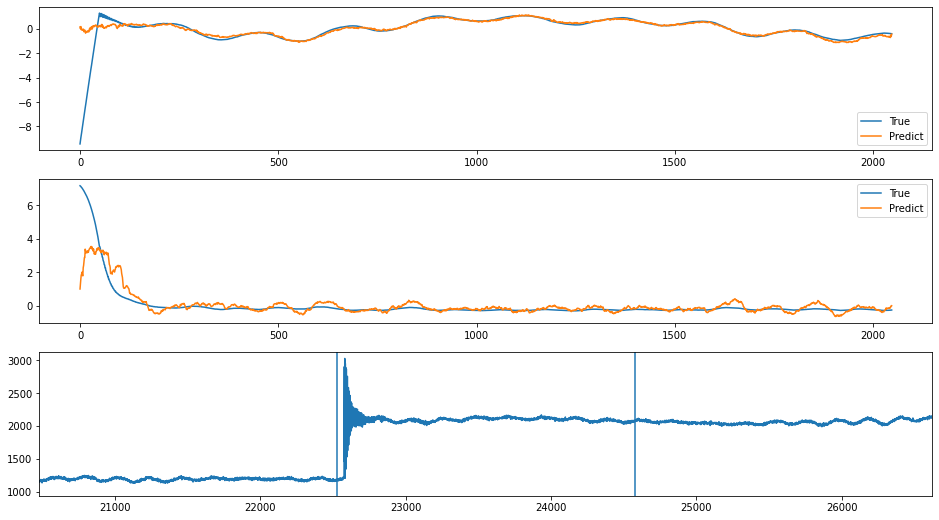

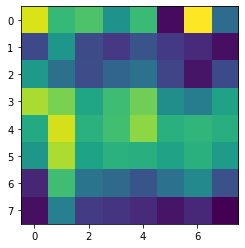

index: 147953
Error: 0.4773293042741574
type                                                         Inst
fill                                                         6936
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 15:04:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6936/...
n_bunches                                                     252
bunch_index                                                   234
bunch_number                                                  147
ts_length                                                   65536
chunk                                                          11
Name: 2837, dtype: object


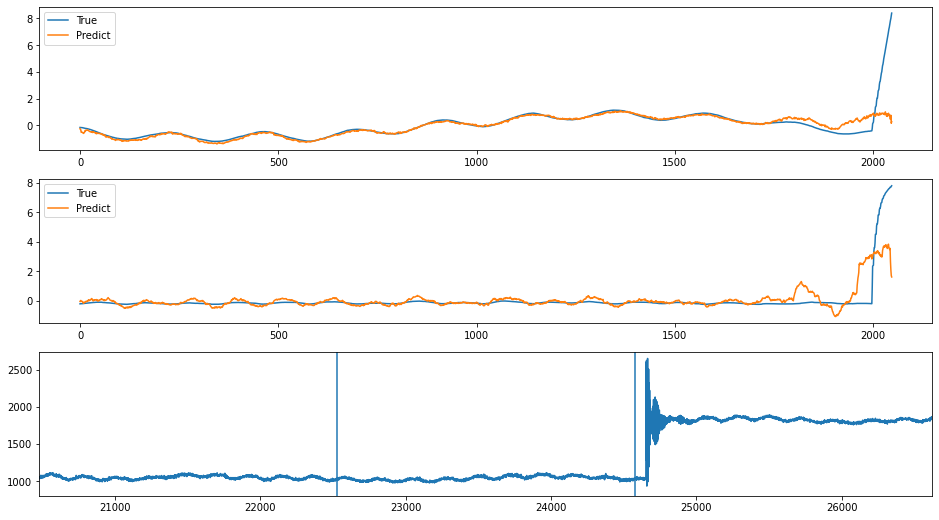

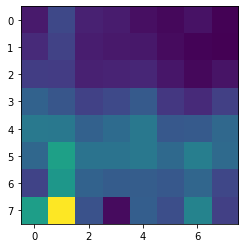

index: 326175
Error: 0.43816325284747454
type                                                         Inst
fill                                                         7270
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-08 23:53:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7270/...
n_bunches                                                     108
bunch_index                                                    80
bunch_number                                                   31
ts_length                                                   65536
chunk                                                          10
Name: 2688, dtype: object


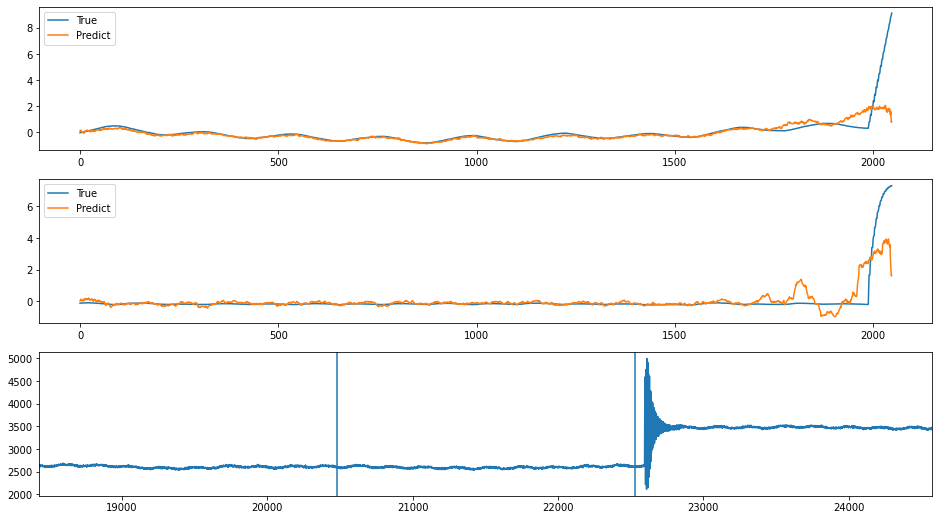

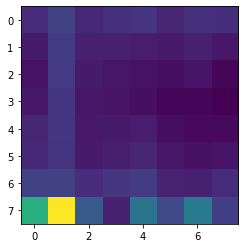

index: 332252
Error: 0.43106733192414987
type                                                         Inst
fill                                                         7270
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-08 23:53:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7270/...
n_bunches                                                     108
bunch_index                                                    80
bunch_number                                                   31
ts_length                                                   65536
chunk                                                          11
Name: 2944, dtype: object


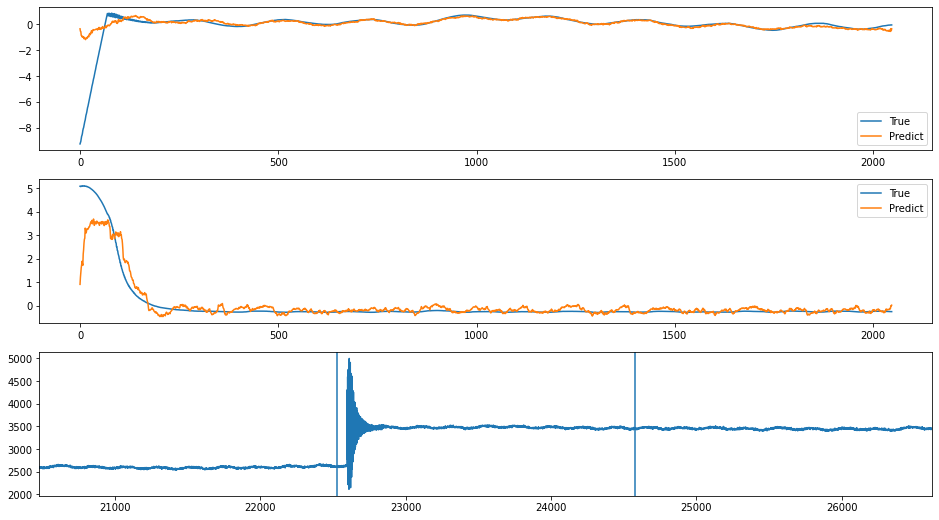

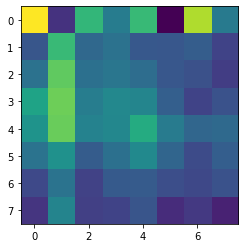

index: 382964
Error: 0.4285321036798339
type                                                         Inst
fill                                                         7091
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-27 01:00:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7091/...
n_bunches                                                     780
bunch_index                                                   346
bunch_number                                                  245
ts_length                                                   65536
chunk                                                          11
Name: 2978, dtype: object


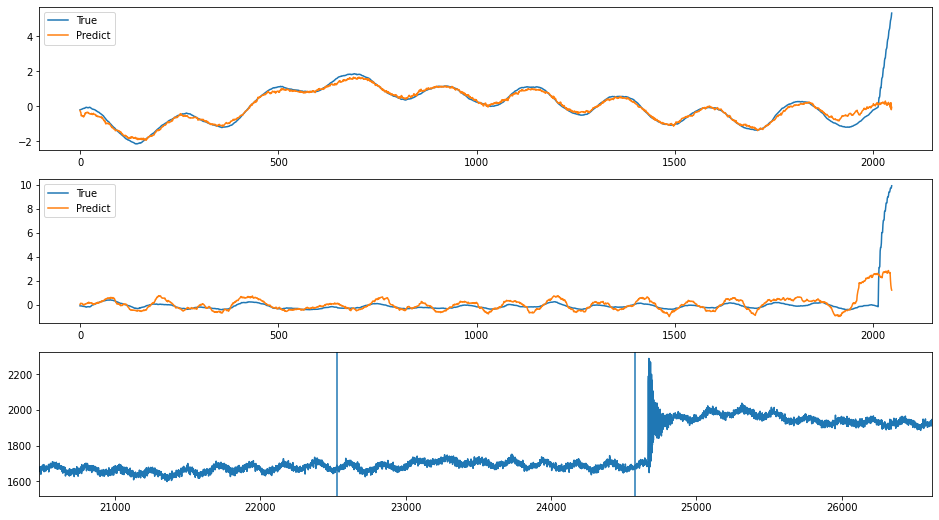

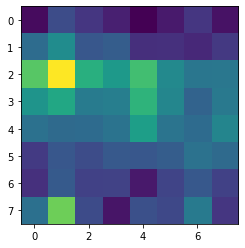

index: 100108
Error: 0.42591281453665714
type                                                         Inst
fill                                                         7097
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-28 14:19:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7097/...
n_bunches                                                     108
bunch_index                                                   104
bunch_number                                                   55
ts_length                                                   65536
chunk                                                          10
Name: 2566, dtype: object


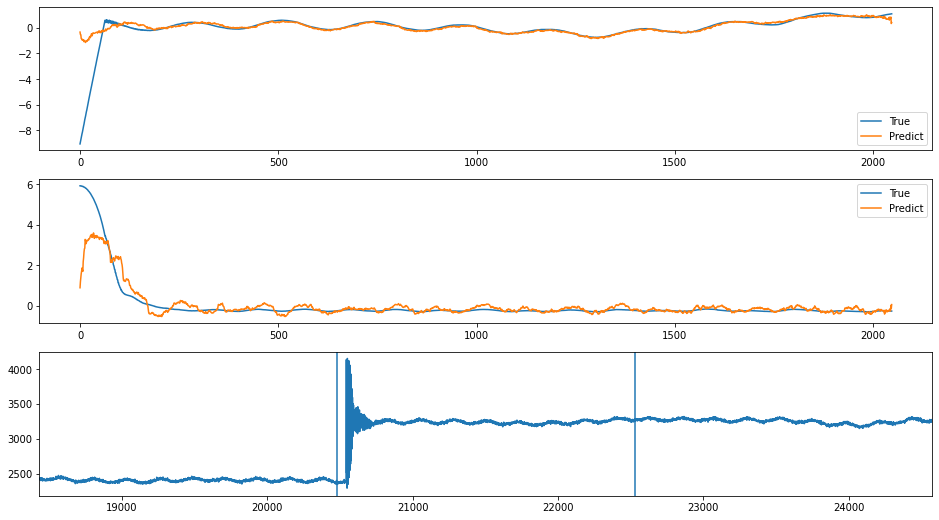

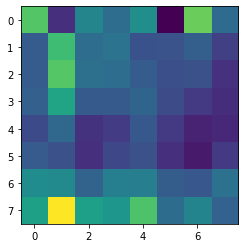

index: 46242
Error: 0.40952241338616574
type                                                         Inst
fill                                                         7320
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-19 15:38:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7320/...
n_bunches                                                     252
bunch_index                                                   290
bunch_number                                                  196
ts_length                                                   65536
chunk                                                           9
Name: 2447, dtype: object


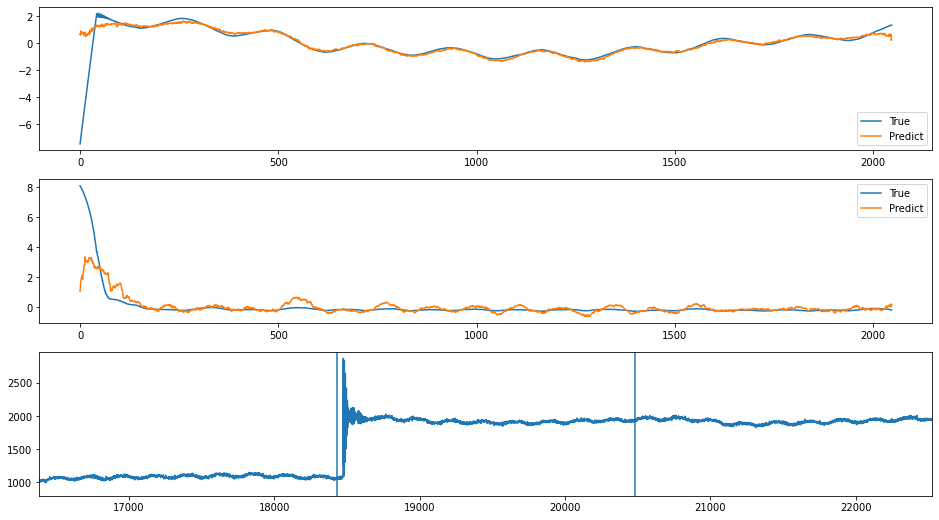

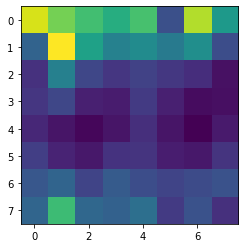

index: 70026
Error: 0.40919666841273367
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 18:19:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                     204
bunch_index                                                   382
bunch_number                                                  201
ts_length                                                   65536
chunk                                                           4
Name: 1030, dtype: object


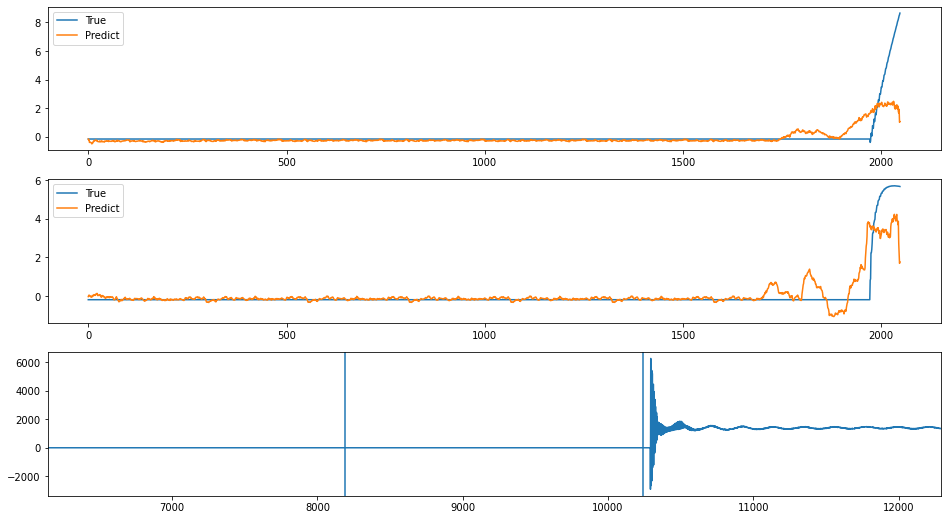

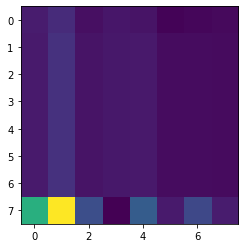

index: 148985
Error: 0.40887561041274895
type                                                         Inst
fill                                                         6936
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 15:04:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6936/...
n_bunches                                                     252
bunch_index                                                   234
bunch_number                                                  147
ts_length                                                   65536
chunk                                                          12
Name: 3093, dtype: object


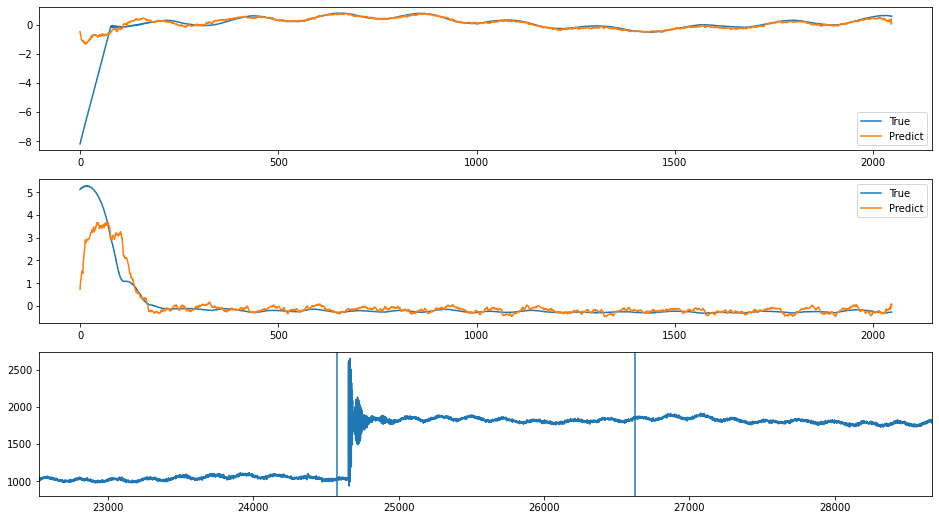

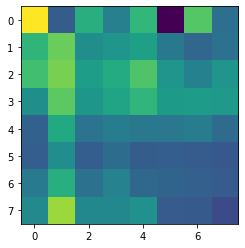

index: 20361
Error: 0.4071946486103496
type                                                         Inst
fill                                                         7109
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 19:45:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7109/...
n_bunches                                                     924
bunch_index                                                  1135
bunch_number                                                  826
ts_length                                                   65536
chunk                                                          11
Name: 3011, dtype: object


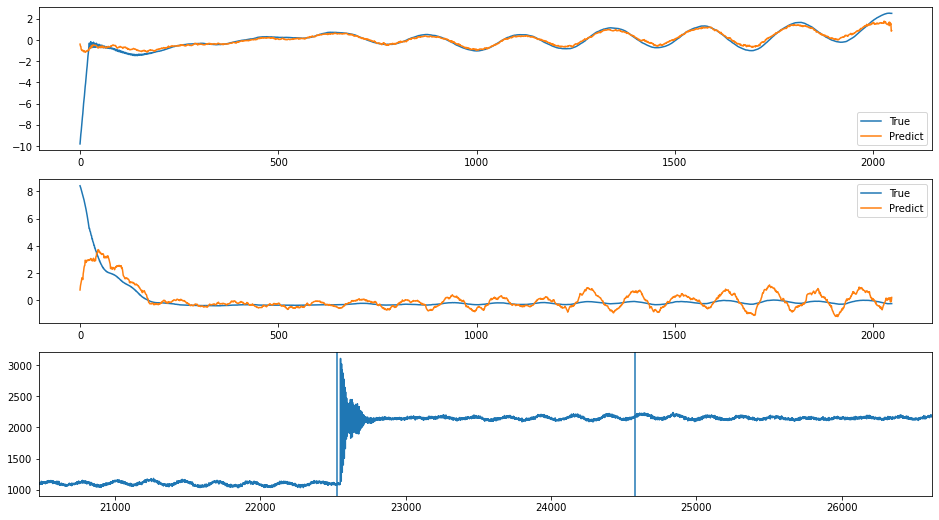

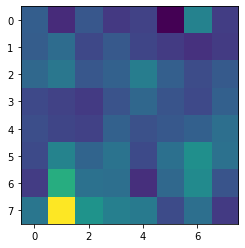

index: 213321
Error: 0.40390057354433817
type                                                         Inst
fill                                                         6283
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:19:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6283/...
n_bunches                                                     780
bunch_index                                                   957
bunch_number                                                  514
ts_length                                                   65536
chunk                                                           9
Name: 2328, dtype: object


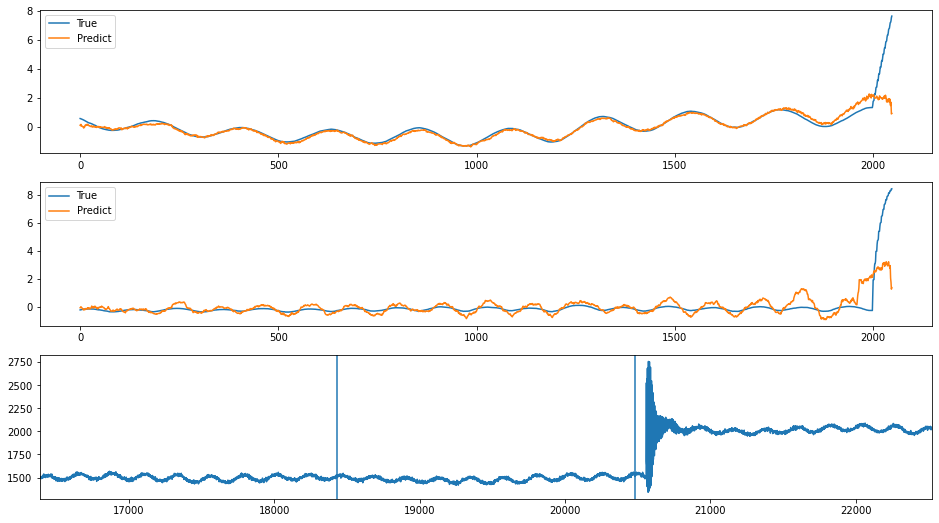

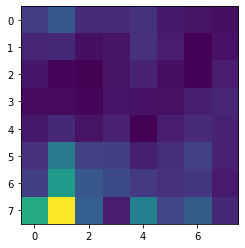

index: 316248
Error: 0.4025212980511264
type                                                         Inst
fill                                                         6760
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-05 15:53:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6760/...
n_bunches                                                     252
bunch_index                                                   357
bunch_number                                                  237
ts_length                                                   65536
chunk                                                          10
Name: 2658, dtype: object


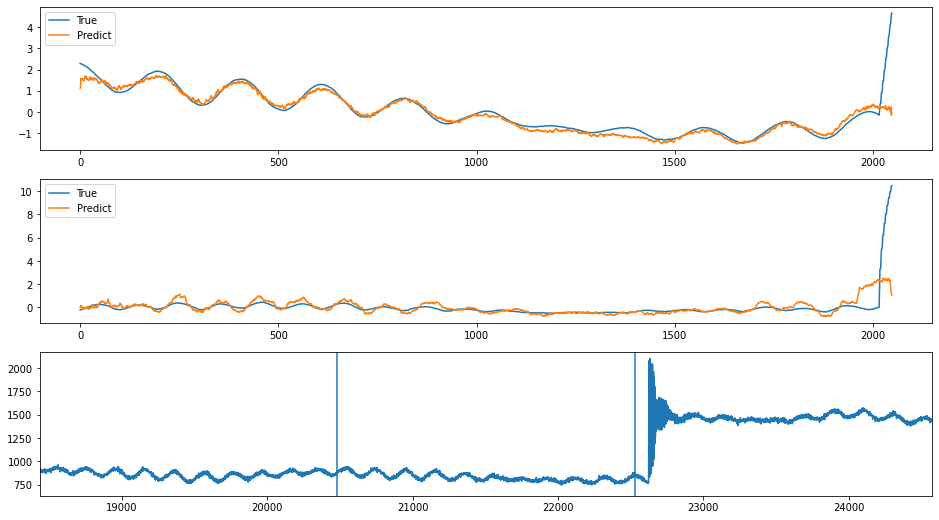

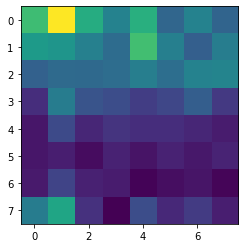

index: 210475
Error: 0.39364020164671437
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:53:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     652
bunch_index                                                  1195
bunch_number                                                  648
ts_length                                                   65536
chunk                                                           6
Name: 1595, dtype: object


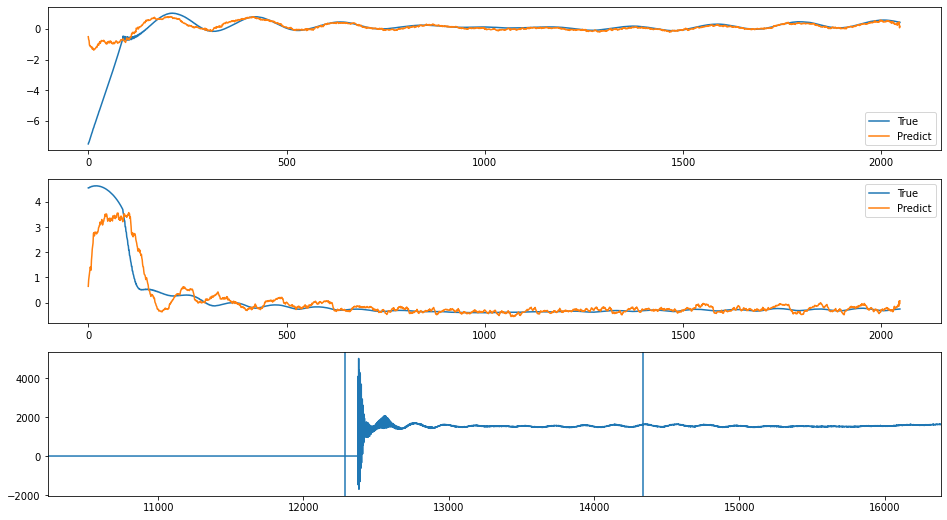

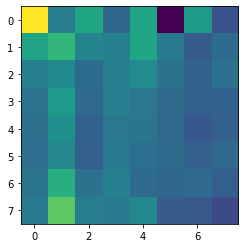

index: 261023
Error: 0.3865319857853097
type                                                         Inst
fill                                                         7045
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-11 23:21:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7045/...
n_bunches                                                     924
bunch_index                                                  1213
bunch_number                                                  890
ts_length                                                   65536
chunk                                                          28
Name: 7406, dtype: object


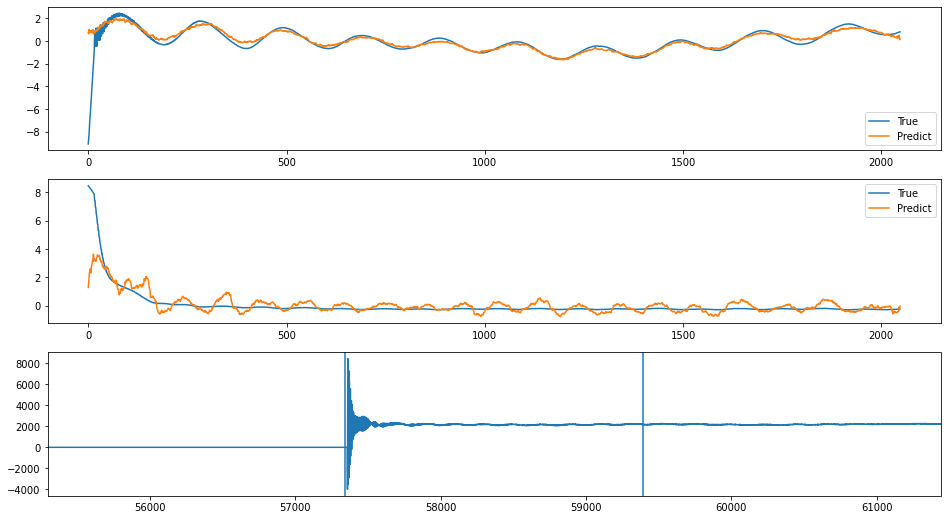

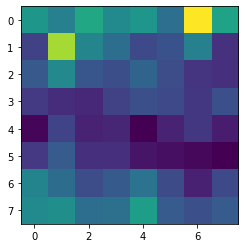

index: 355911
Error: 0.3837346739204705
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:43:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     780
bunch_index                                                   973
bunch_number                                                  702
ts_length                                                   65536
chunk                                                          10
Name: 2689, dtype: object


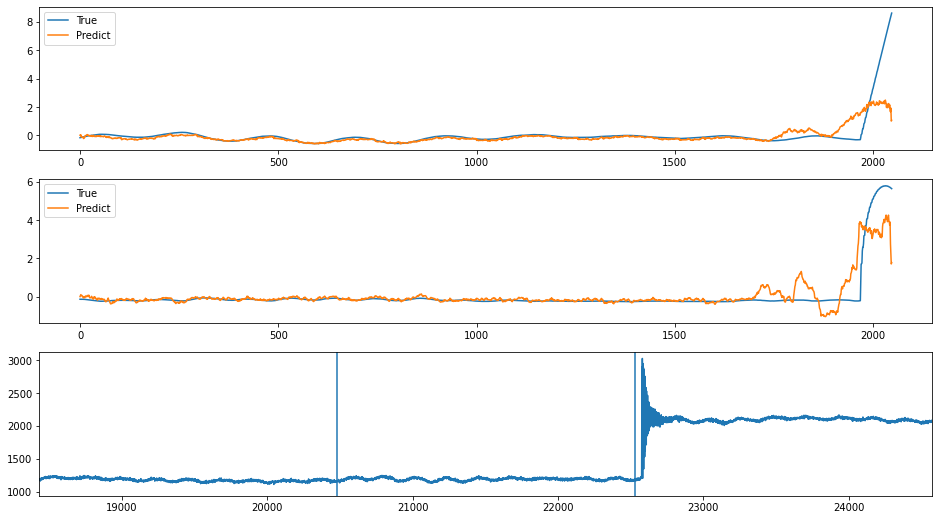

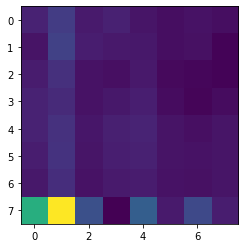

index: 180557
Error: 0.37744975817120413
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:13:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     180
bunch_index                                                   266
bunch_number                                                  138
ts_length                                                   65536
chunk                                                          30
Name: 7903, dtype: object


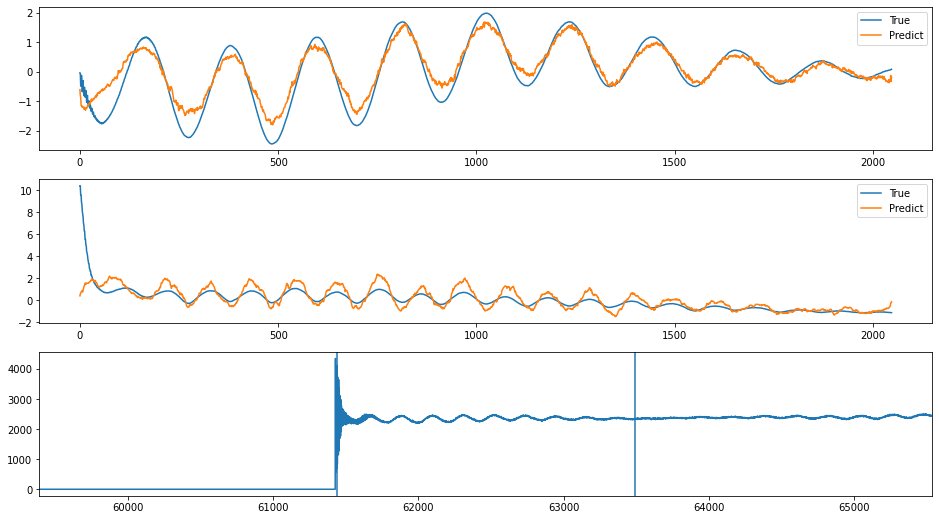

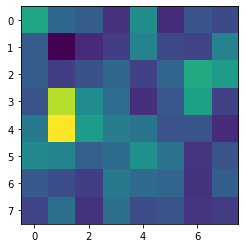

index: 247215
Error: 0.3754854488436871
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 06:19:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1300
bunch_index                                                  2270
bunch_number                                                 1252
ts_length                                                   65536
chunk                                                           5
Name: 1381, dtype: object


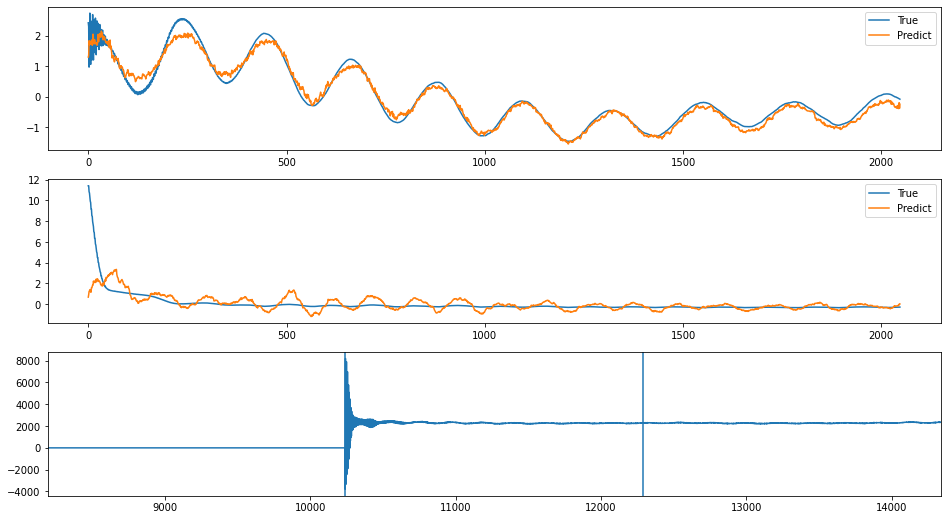

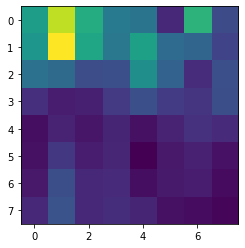

index: 268280
Error: 0.3654922150646189
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 12:48:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                      12
bunch_index                                                    15
bunch_number                                                    8
ts_length                                                   65536
chunk                                                           2
Name: 630, dtype: object


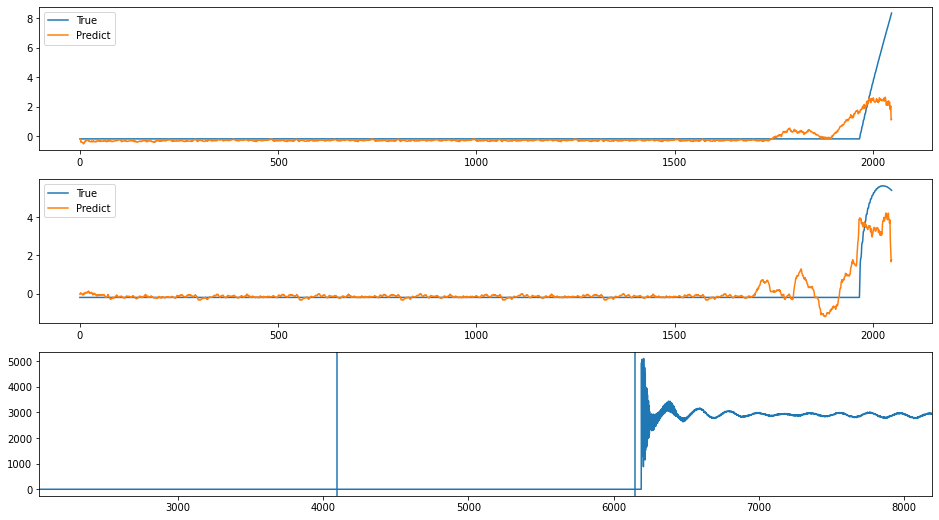

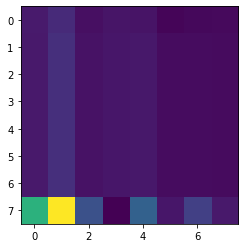

index: 121988
Error: 0.35003332100587775
type                                                         Inst
fill                                                         6921
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 14:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6921/...
n_bunches                                                     252
bunch_index                                                   218
bunch_number                                                  131
ts_length                                                   65536
chunk                                                           7
Name: 1957, dtype: object


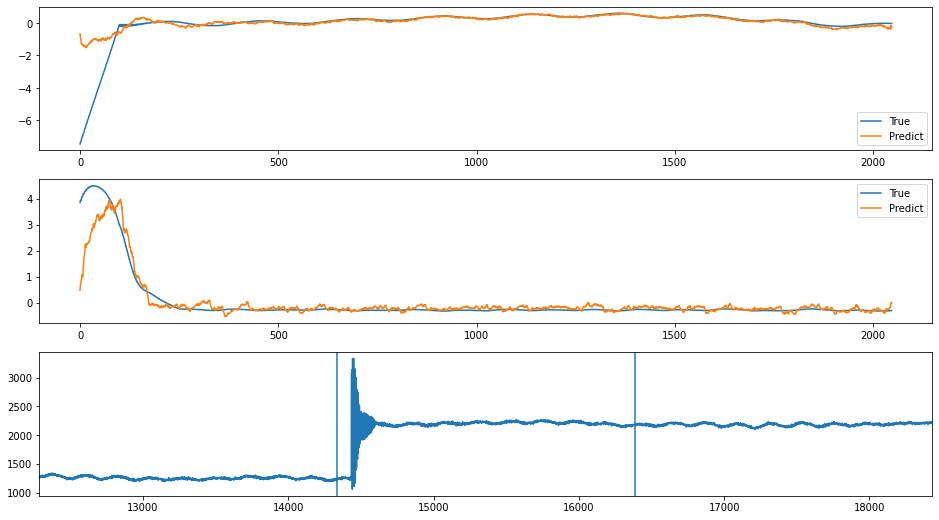

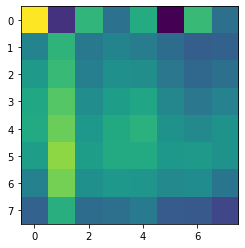

index: 310776
Error: 0.34490804806695174
type                                                         Inst
fill                                                         6760
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-05 15:53:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6760/...
n_bunches                                                     252
bunch_index                                                   357
bunch_number                                                  237
ts_length                                                   65536
chunk                                                          11
Name: 2914, dtype: object


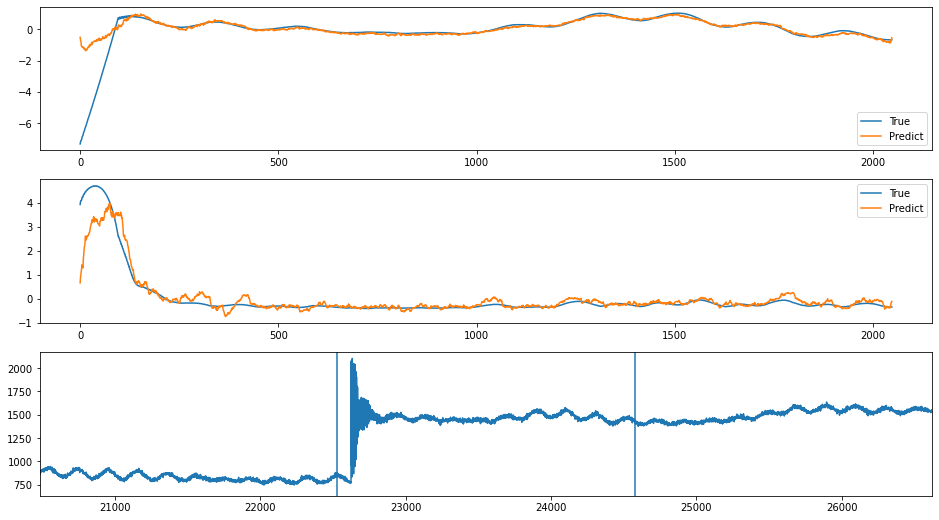

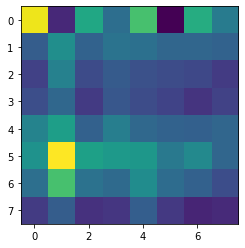

index: 210240
Error: 0.3444108712752189
type                                                         Inst
fill                                                         6283
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:19:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6283/...
n_bunches                                                     780
bunch_index                                                   957
bunch_number                                                  514
ts_length                                                   65536
chunk                                                          10
Name: 2584, dtype: object


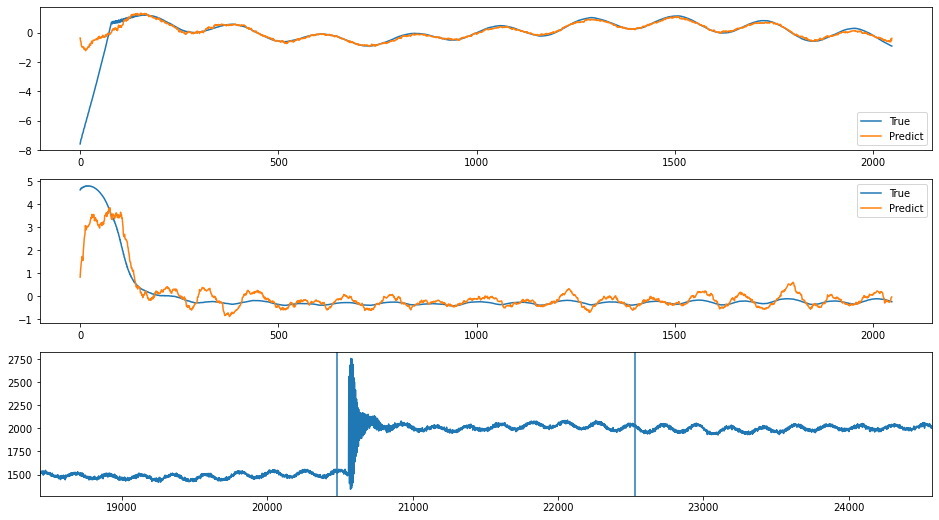

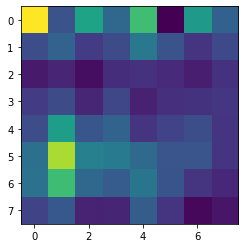

index: 156123
Error: 0.33924934859647965
type                                                         Inst
fill                                                         6729
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-26 15:15:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6729/...
n_bunches                                                     252
bunch_index                                                   353
bunch_number                                                  233
ts_length                                                   65536
chunk                                                          11
Name: 3042, dtype: object


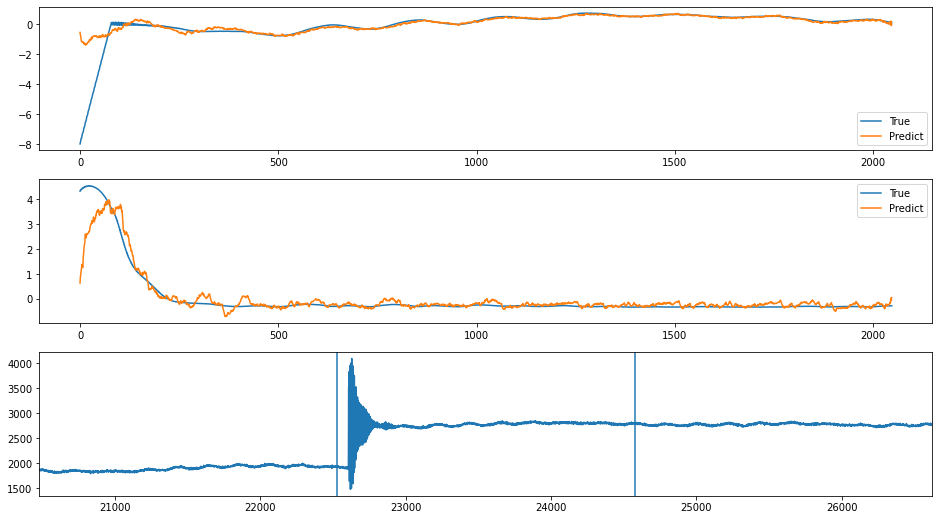

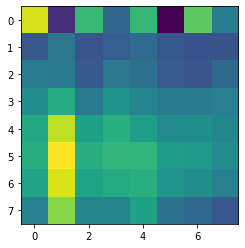

index: 200609
Error: 0.33715951285049217
type                                                         Inst
fill                                                         6355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 18:19:12
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...
n_bunches                                                     524
bunch_index                                                   878
bunch_number                                                  462
ts_length                                                   65536
chunk                                                           6
Name: 1578, dtype: object


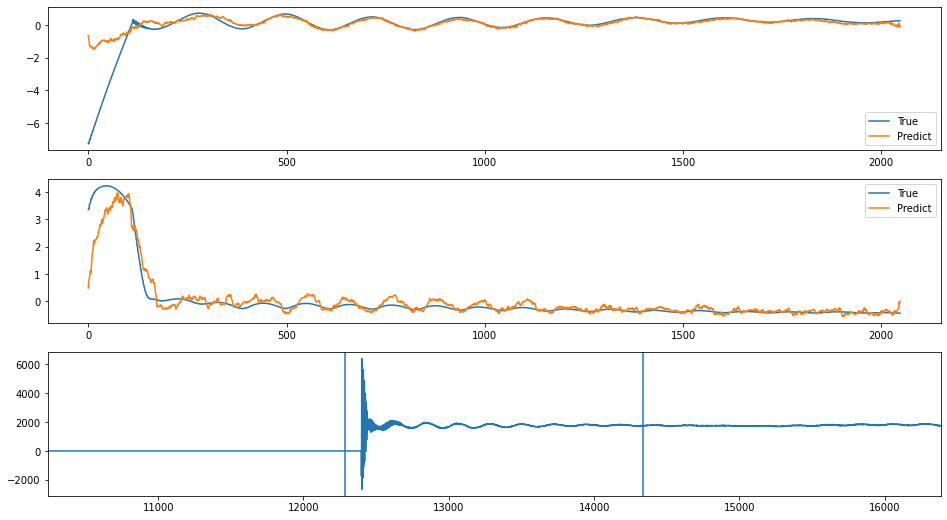

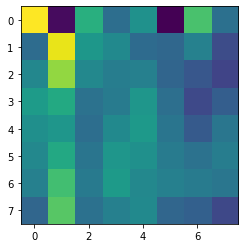

index: 382407
Error: 0.3357522418006989
type                                                         Inst
fill                                                         6755
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-03 17:29:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6755/...
n_bunches                                                     924
bunch_index                                                  1218
bunch_number                                                  876
ts_length                                                   65536
chunk                                                          11
Name: 2941, dtype: object


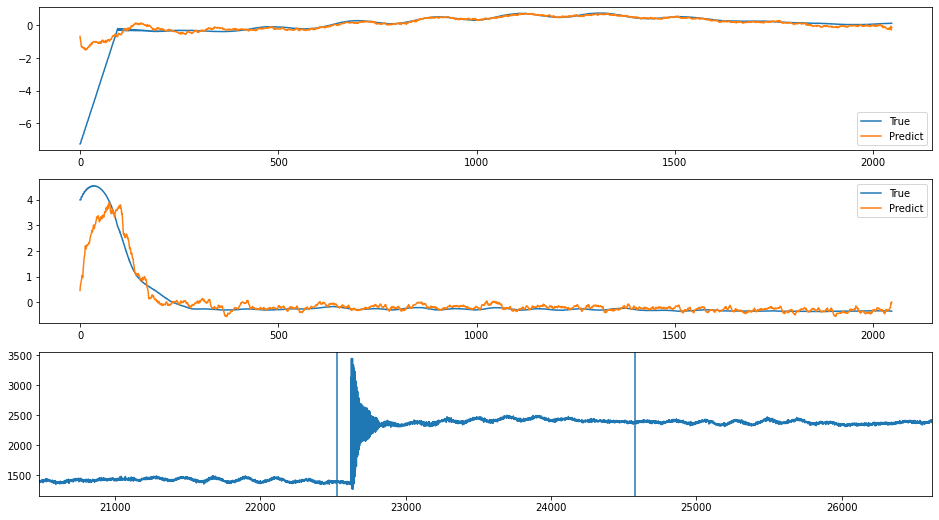

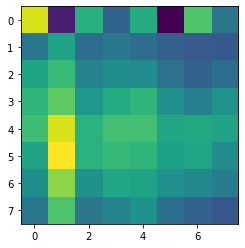

index: 47404
Error: 0.33360313950605447
type                                                         Inst
fill                                                         7320
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-19 15:38:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7320/...
n_bunches                                                     252
bunch_index                                                   290
bunch_number                                                  196
ts_length                                                   65536
chunk                                                           8
Name: 2191, dtype: object


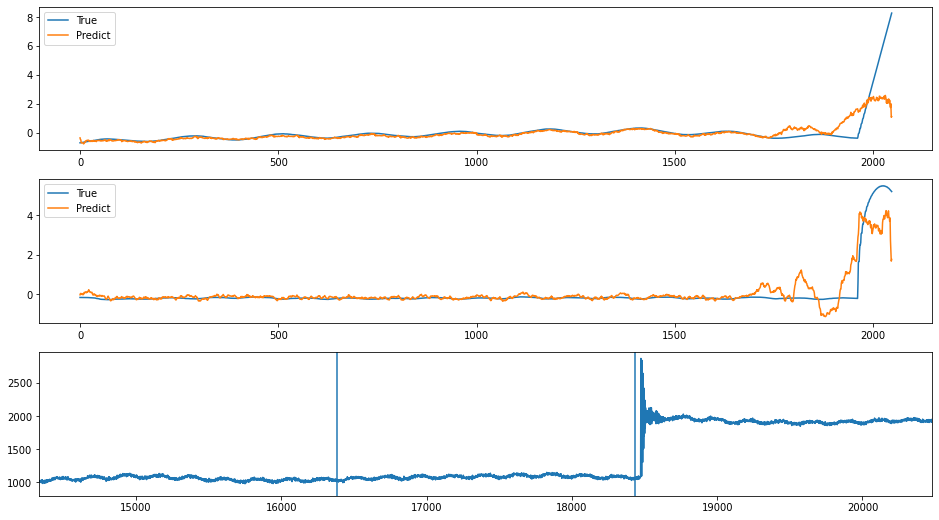

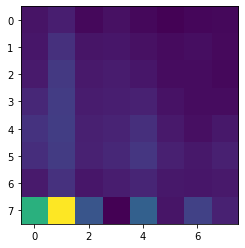

index: 127254
Error: 0.33057650752540063
type                                                         Inst
fill                                                         6755
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-03 17:25:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6755/...
n_bunches                                                     396
bunch_index                                                   461
bunch_number                                                  303
ts_length                                                   65536
chunk                                                          11
Name: 3054, dtype: object


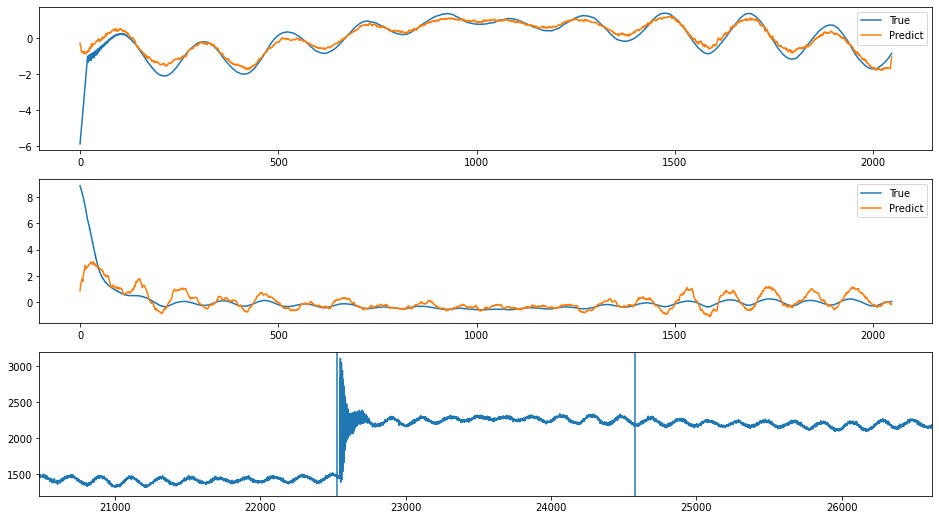

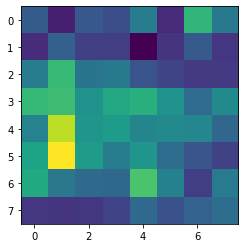

index: 150857
Error: 0.3291077638422644
type                                                         Inst
fill                                                         6729
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-26 15:15:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6729/...
n_bunches                                                     252
bunch_index                                                   353
bunch_number                                                  233
ts_length                                                   65536
chunk                                                          10
Name: 2786, dtype: object


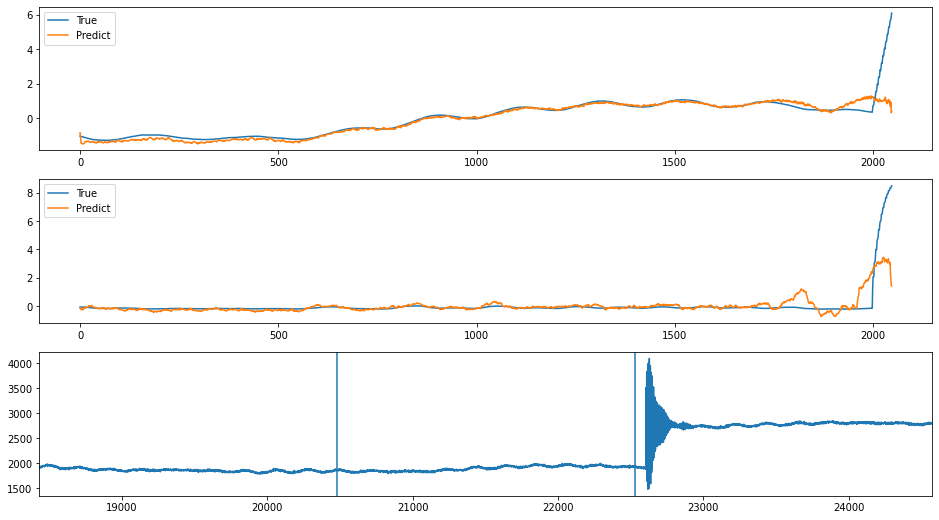

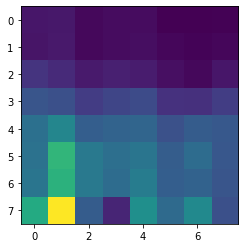

index: 92810
Error: 0.3284937455697243
type                                                         Inst
fill                                                         7382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:54:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7382/...
n_bunches                                                     156
bunch_index                                                   956
bunch_number                                                   61
ts_length                                                   65536
chunk                                                          17
Name: 4480, dtype: object


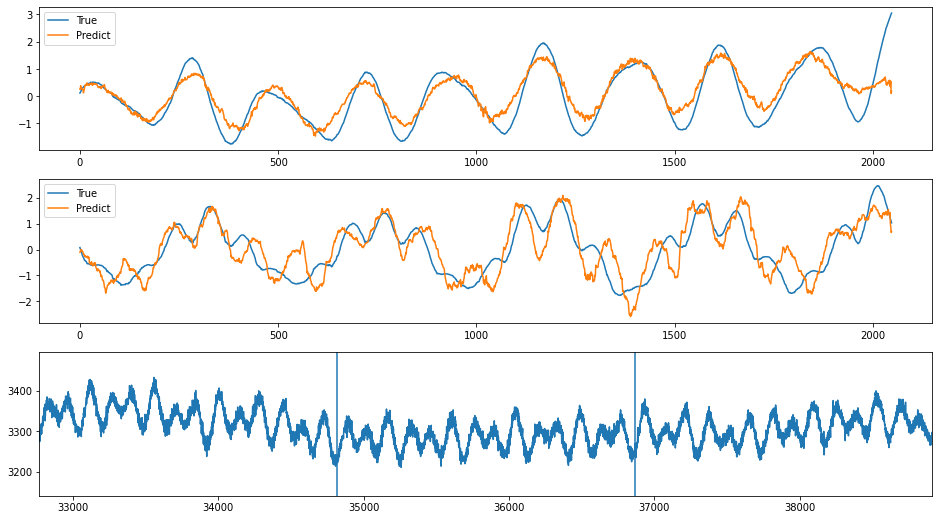

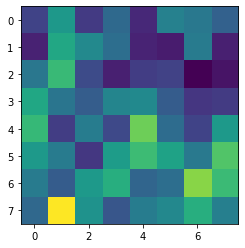

index: 392605
Error: 0.32179099798638094
type                                                         Inst
fill                                                         6337
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 05:18:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6337/...
n_bunches                                                     428
bunch_index                                                   702
bunch_number                                                  380
ts_length                                                   65536
chunk                                                           6
Name: 1630, dtype: object


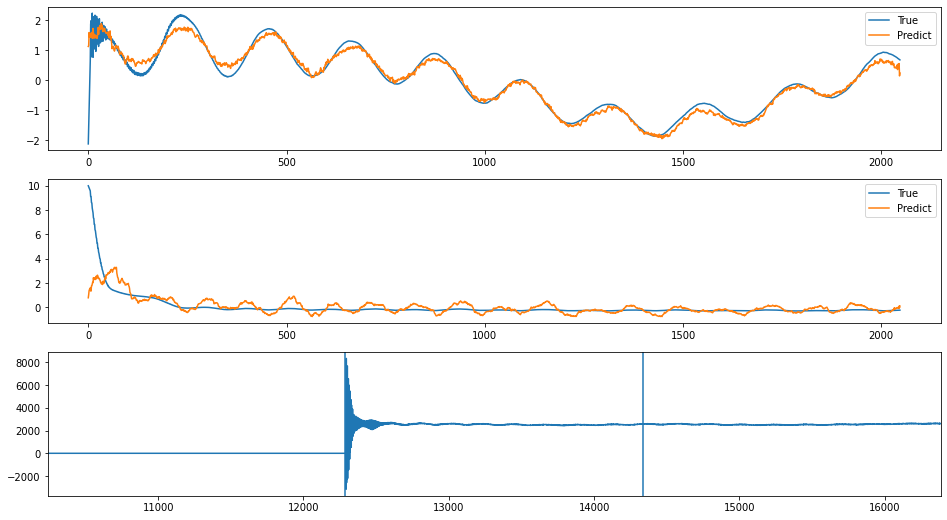

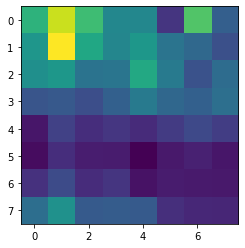

index: 302192
Error: 0.31729631042661716
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 06:26:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1692
bunch_index                                                  2037
bunch_number                                                 1120
ts_length                                                   65536
chunk                                                          10
Name: 2663, dtype: object


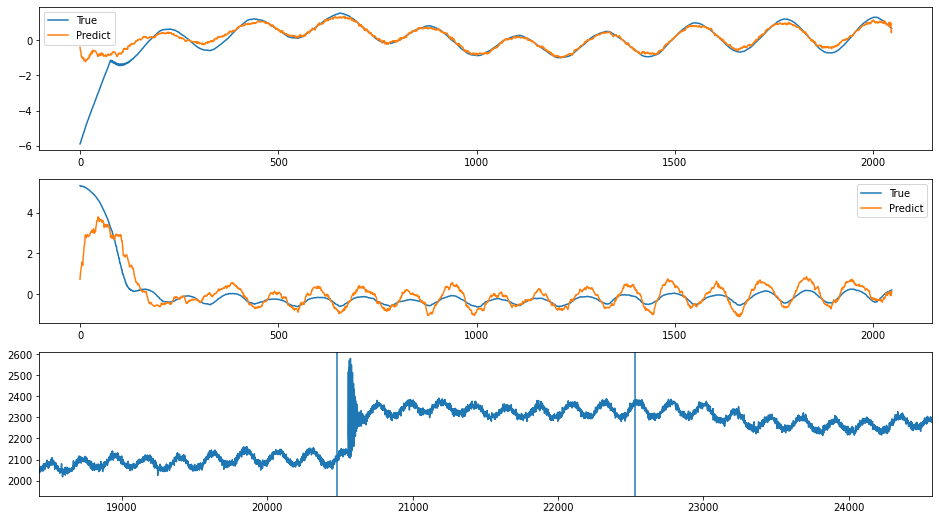

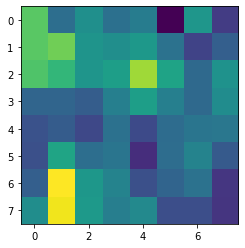

index: 306627
Error: 0.31338078895550536
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 06:26:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1692
bunch_index                                                  2037
bunch_number                                                 1120
ts_length                                                   65536
chunk                                                           9
Name: 2407, dtype: object


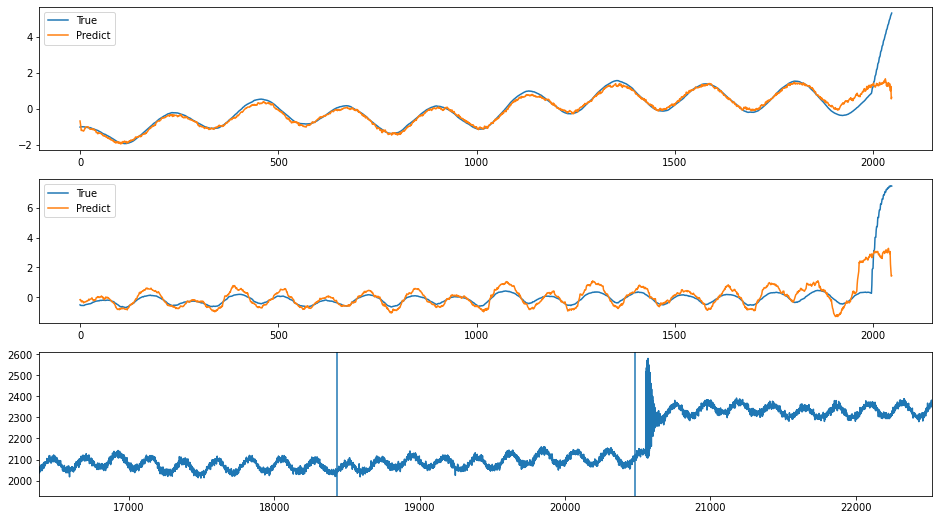

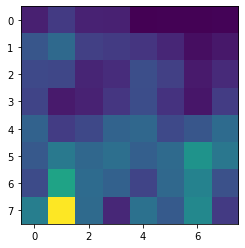

index: 143322
Error: 0.3106769178967363
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:03:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     572
bunch_index                                                   923
bunch_number                                                  498
ts_length                                                   65536
chunk                                                           4
Name: 1246, dtype: object


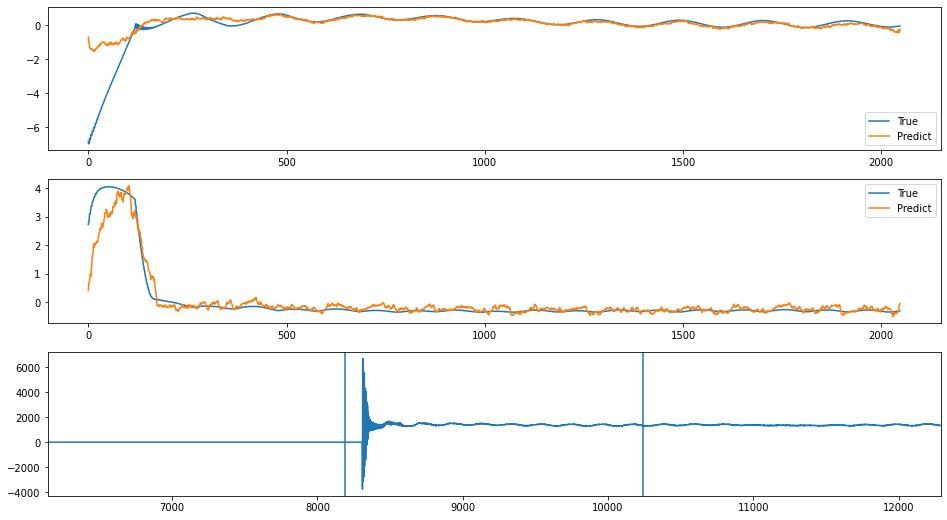

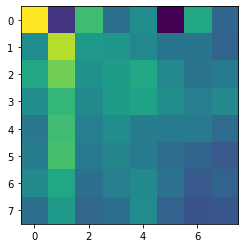

index: 232789
Error: 0.3105402826084406
type                                                         Inst
fill                                                         7095
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-28 01:58:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7095/...
n_bunches                                                     924
bunch_index                                                  1156
bunch_number                                                  840
ts_length                                                   65536
chunk                                                          11
Name: 3063, dtype: object


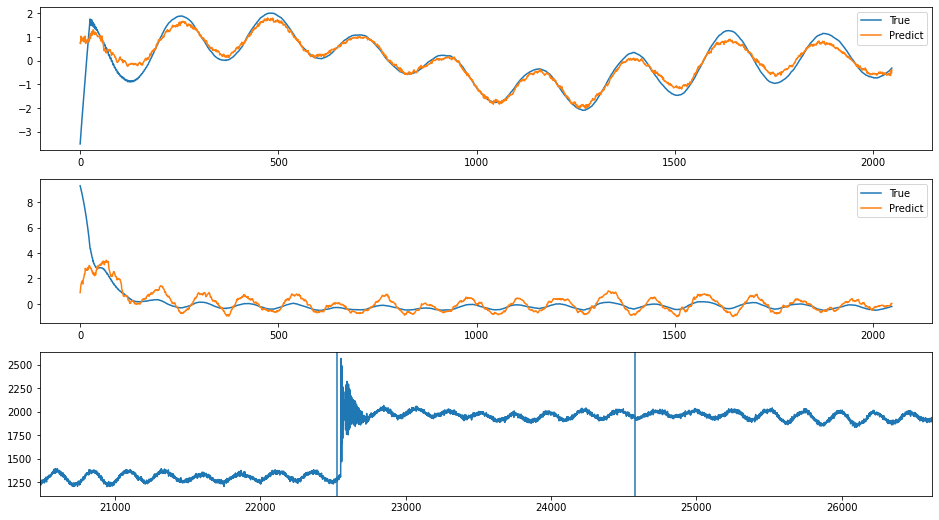

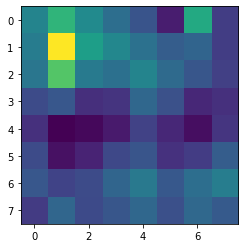

index: 249444
Error: 0.2979988641285689
type                                                         Inst
fill                                                         7361
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 15:08:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7361/...
n_bunches                                                     180
bunch_index                                                   622
bunch_number                                                    8
ts_length                                                   65536
chunk                                                           1
Name: 316, dtype: object


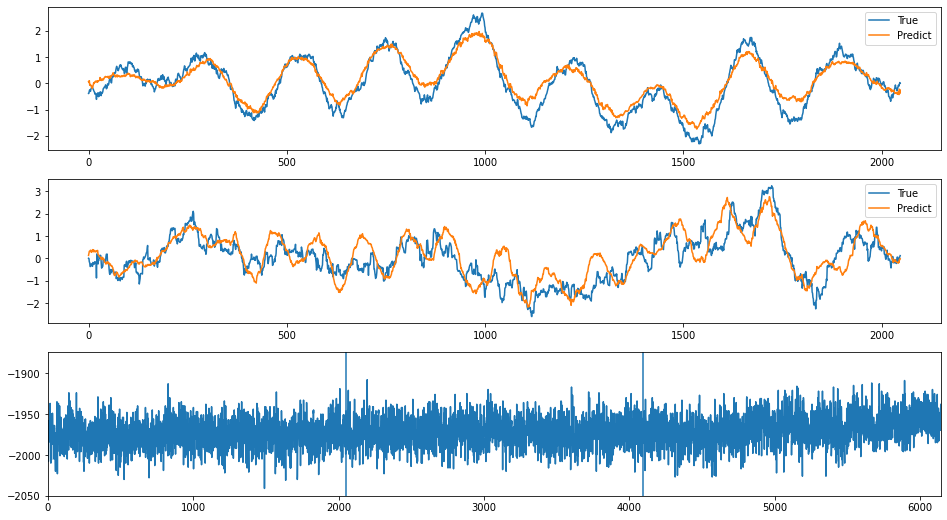

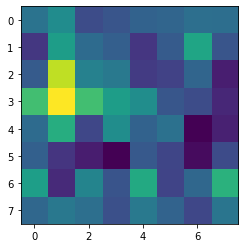

index: 2295
Error: 0.29642242634837035
type                                                         Inst
fill                                                         6686
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 12:28:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6686/...
n_bunches                                                     396
bunch_index                                                   471
bunch_number                                                  281
ts_length                                                   65536
chunk                                                          11
Name: 2965, dtype: object


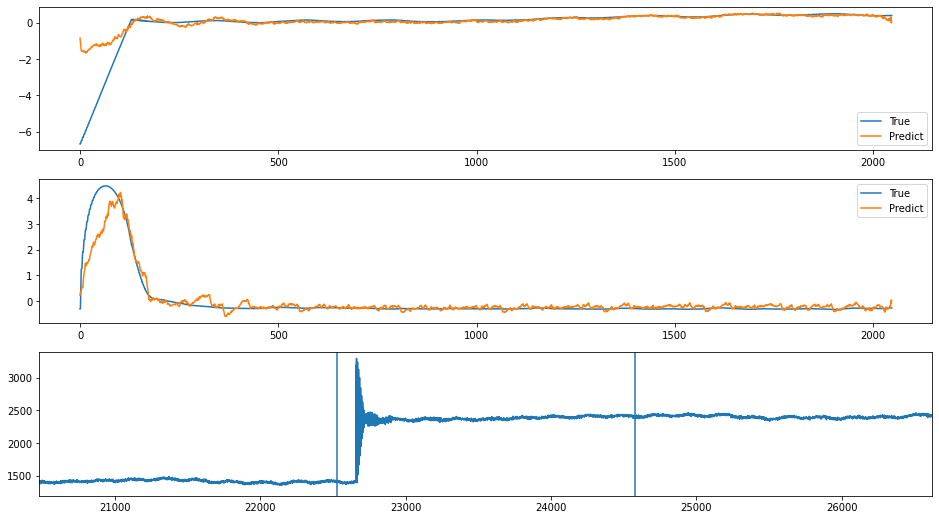

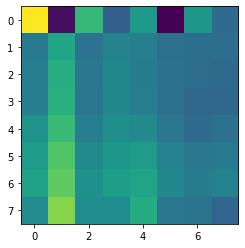

index: 377516
Error: 0.2961605263483126
type                                                         Inst
fill                                                         6399
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-20 12:32:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6399/...
n_bunches                                                     780
bunch_index                                                  1800
bunch_number                                                  766
ts_length                                                   65536
chunk                                                           5
Name: 1390, dtype: object


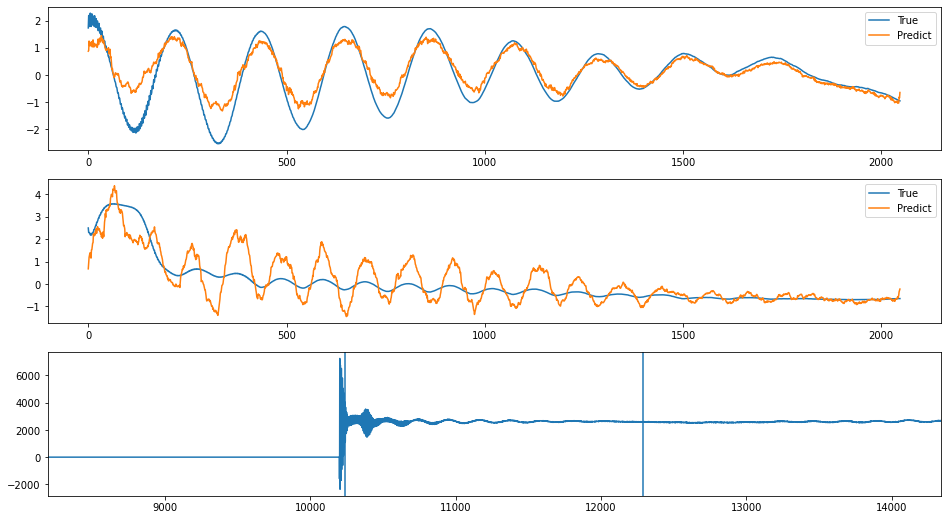

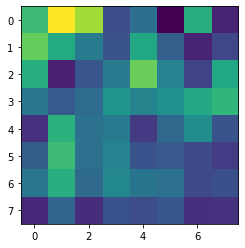

index: 114798
Error: 0.2936390159360901
type                                                         Inst
fill                                                         6398
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-19 21:08:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6398/...
n_bunches                                                     524
bunch_index                                                  1132
bunch_number                                                  482
ts_length                                                   65536
chunk                                                          10
Name: 2632, dtype: object


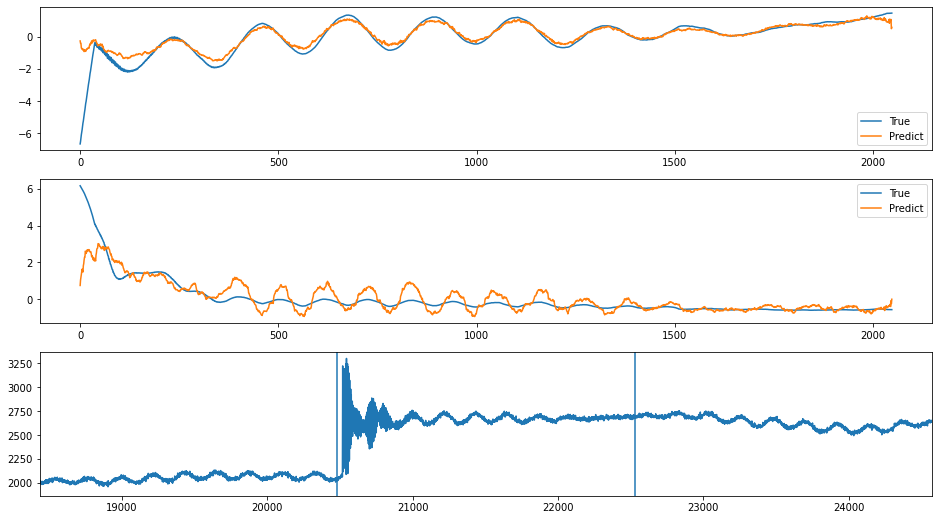

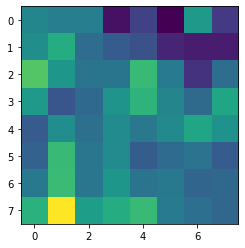

index: 320824
Error: 0.2930245141552279
type                                                         Inst
fill                                                         7362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 16:21:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7362/...
n_bunches                                                     157
bunch_index                                                   360
bunch_number                                                  121
ts_length                                                   65536
chunk                                                          26
Name: 6830, dtype: object


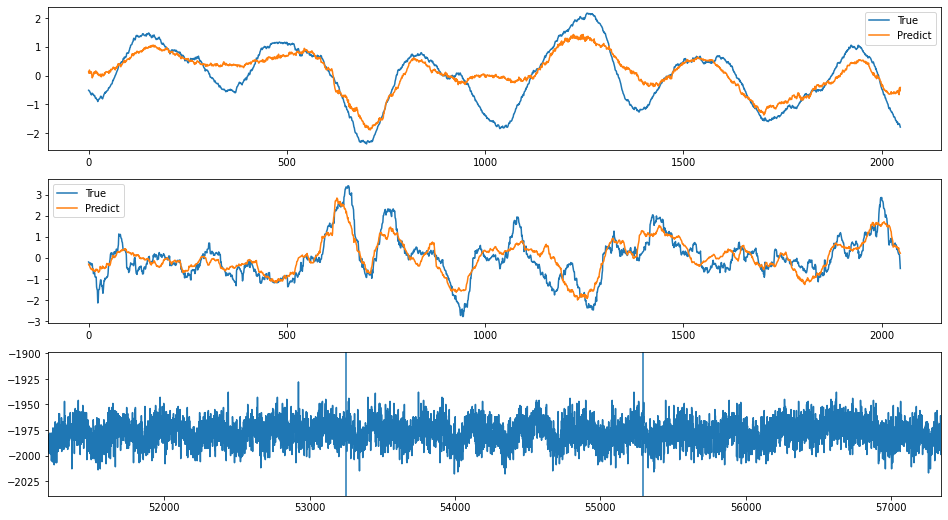

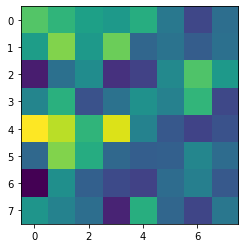

index: 376004
Error: 0.2892876697428488
type                                                         Inst
fill                                                         7365
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 23:14:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7365/...
n_bunches                                                     852
bunch_index                                                   214
bunch_number                                                   81
ts_length                                                   65536
chunk                                                          14
Name: 3765, dtype: object


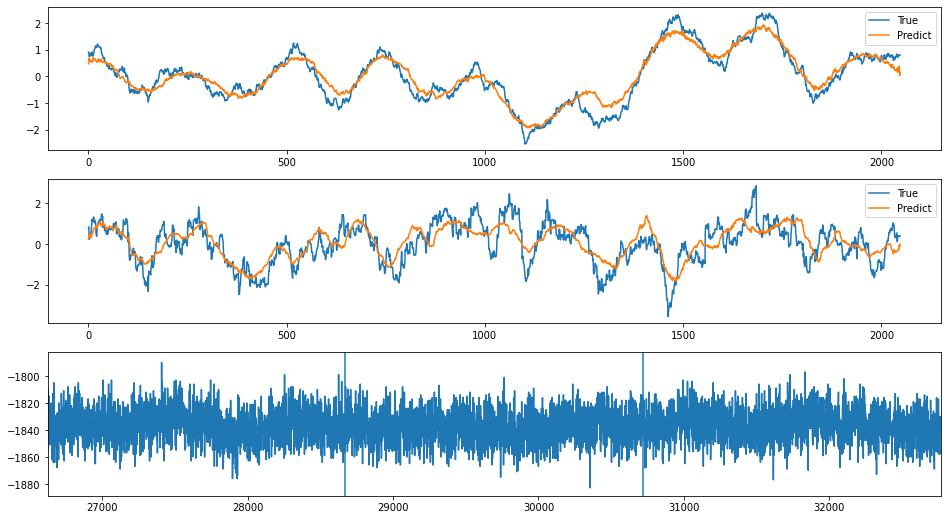

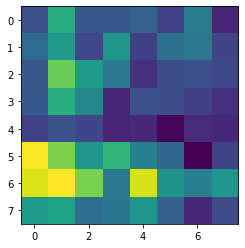

index: 362849
Error: 0.28844480863927885
type                                                         Inst
fill                                                         6738
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-29 00:04:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6738/...
n_bunches                                                     252
bunch_index                                                    89
bunch_number                                                   21
ts_length                                                   65536
chunk                                                          13
Name: 3382, dtype: object


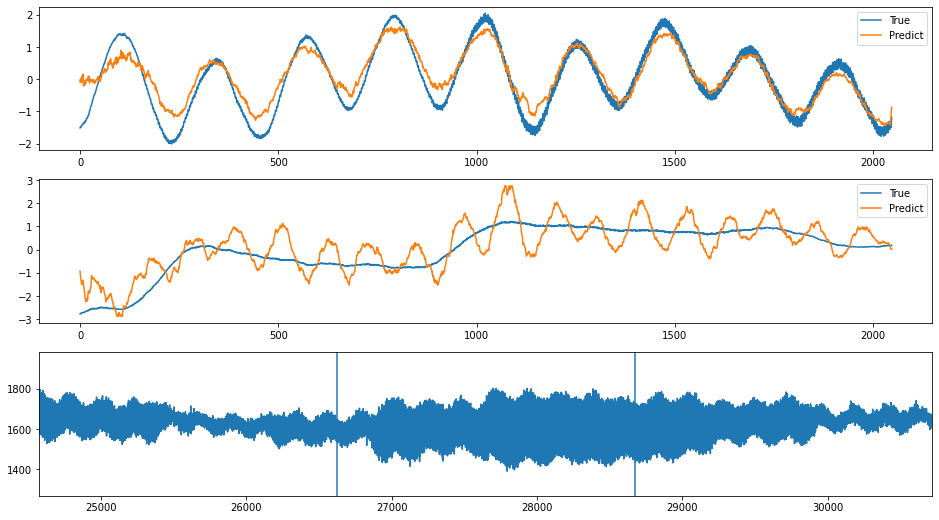

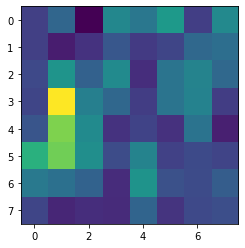

index: 223686
Error: 0.2873783155943302
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:08:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     300
bunch_index                                                   480
bunch_number                                                  258
ts_length                                                   65536
chunk                                                           6
Name: 1715, dtype: object


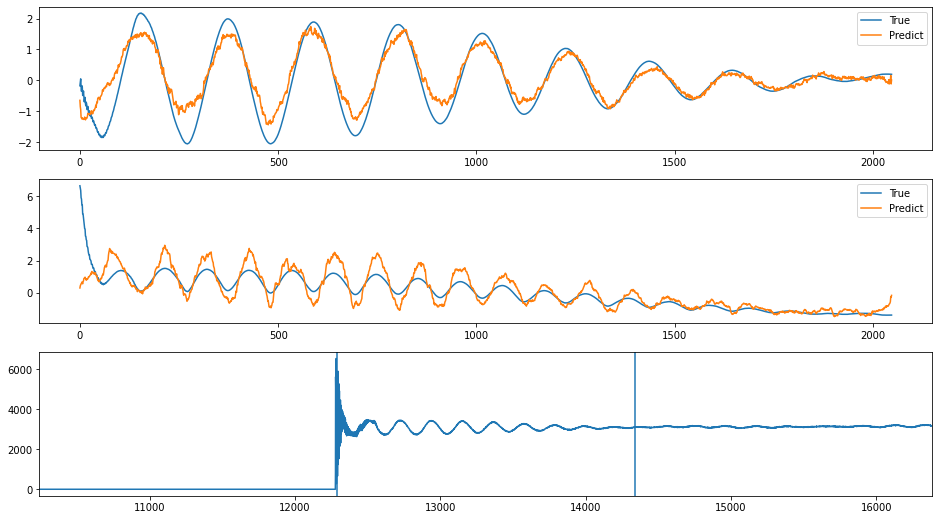

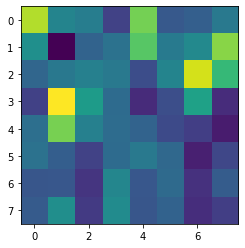

index: 143663
Error: 0.28644887852076895
type                                                         Inst
fill                                                         6615
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-26 18:27:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6615/...
n_bunches                                                      72
bunch_index                                                   168
bunch_number                                                   61
ts_length                                                   65536
chunk                                                          10
Name: 2810, dtype: object


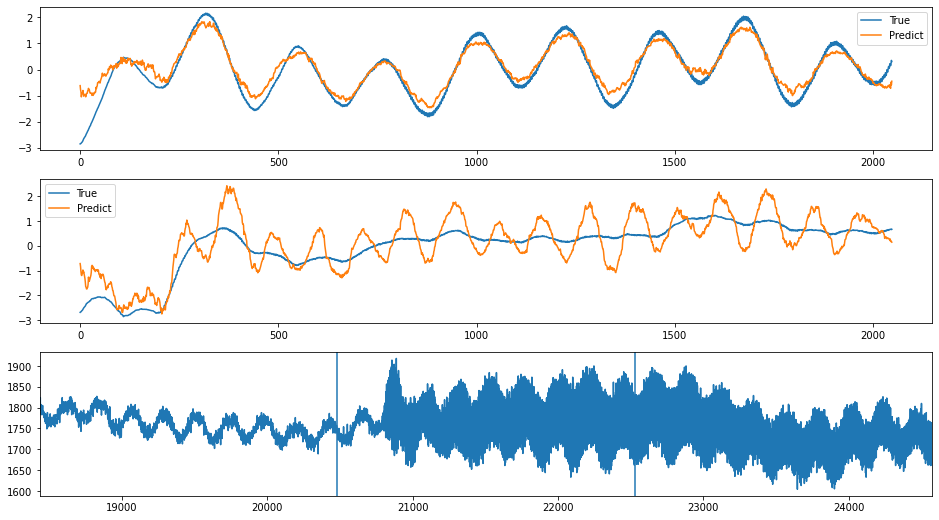

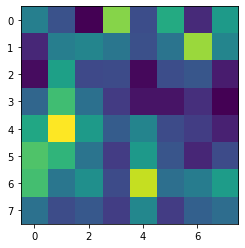

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 47303
Error: 0.06610868782182315
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 19:52:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     670
bunch_index                                                   964
bunch_number                                                  199
ts_length                                                   65536
chunk                                                          18
Name: 4755, dtype: object


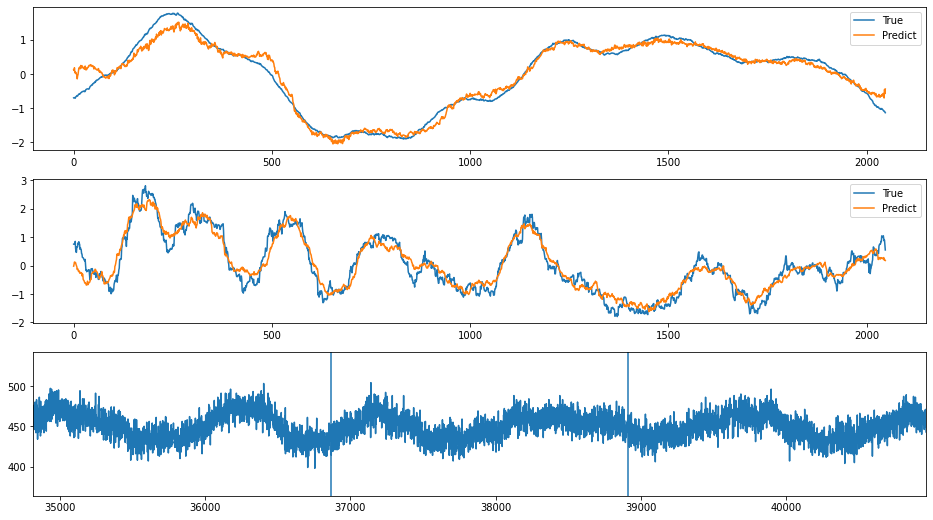

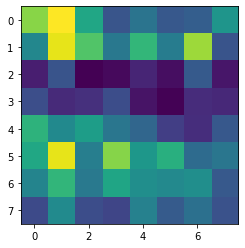

index: 259383
Error: 0.0661086137151776
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 18:52:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     271
bunch_index                                                   940
bunch_number                                                  193
ts_length                                                   65536
chunk                                                          22
Name: 5708, dtype: object


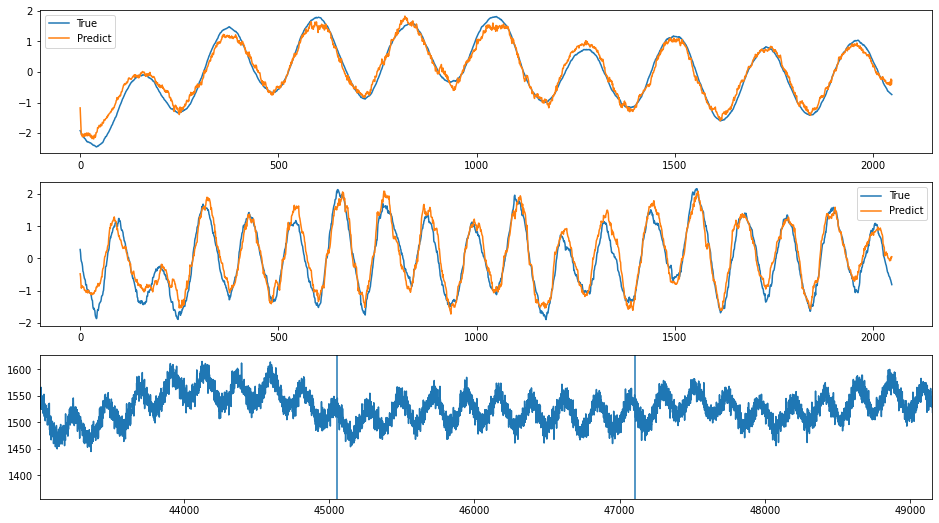

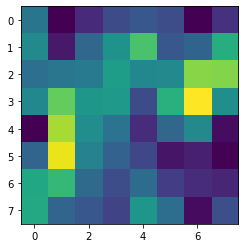

index: 68694
Error: 0.06610871508128124
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 22:42:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                    1452
bunch_index                                                   122
bunch_number                                                   35
ts_length                                                   65536
chunk                                                           7
Name: 2013, dtype: object


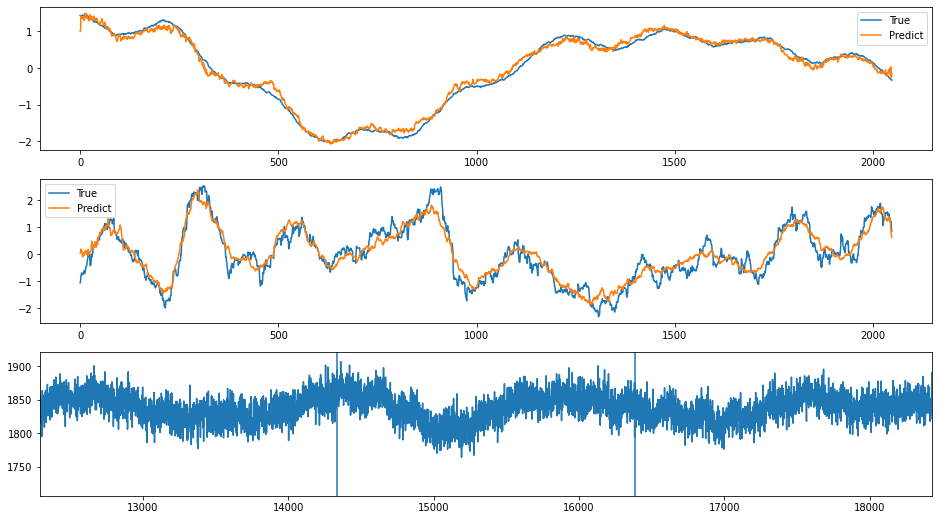

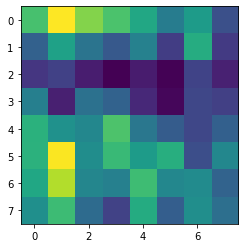

index: 318618
Error: 0.06610858381619181
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 05:18:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                    1868
bunch_index                                                  1172
bunch_number                                                  633
ts_length                                                   65536
chunk                                                           8
Name: 2089, dtype: object


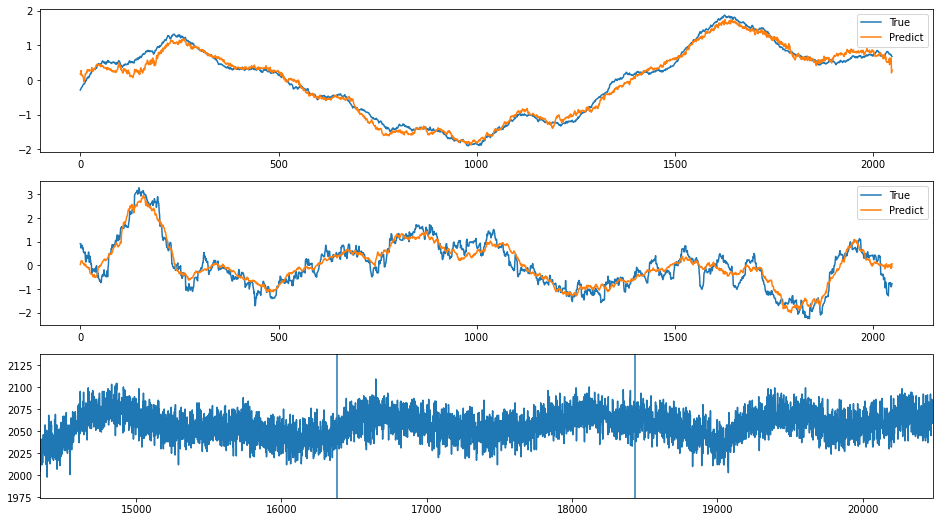

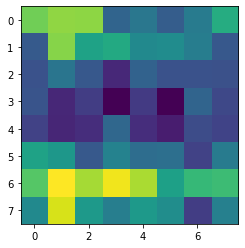

index: 262282
Error: 0.06610883184352644
type                                                         Inst
fill                                                         7095
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-28 01:53:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7095/...
n_bunches                                                     396
bunch_index                                                   163
bunch_number                                                  107
ts_length                                                   65536
chunk                                                          16
Name: 4348, dtype: object


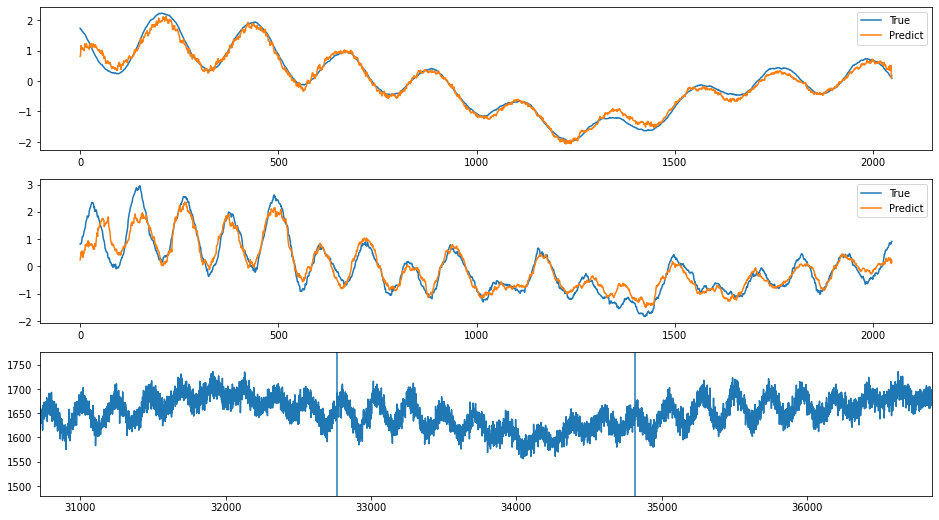

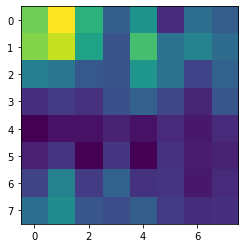

index: 129938
Error: 0.0661090890064699
type                                                         Inst
fill                                                         7464
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 02:38:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7464/...
n_bunches                                                     232
bunch_index                                                   416
bunch_number                                                   35
ts_length                                                   65536
chunk                                                          12
Name: 3132, dtype: object


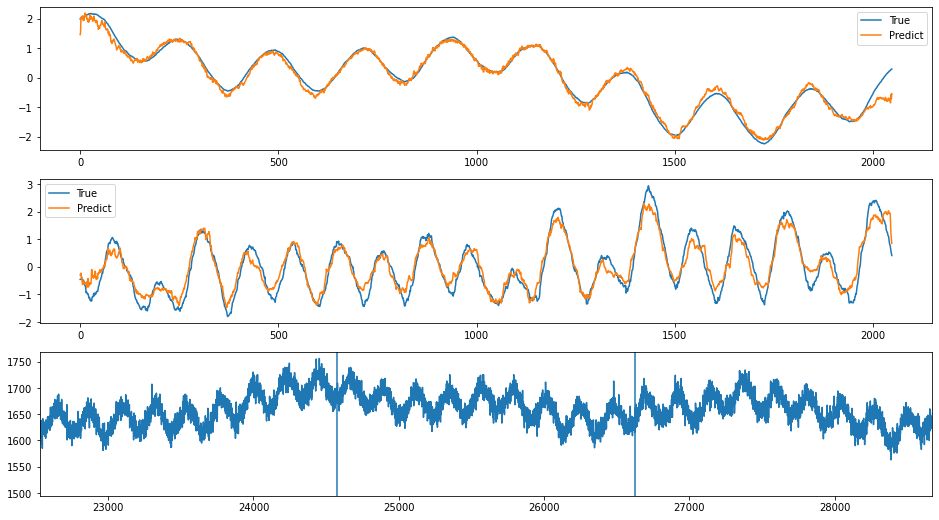

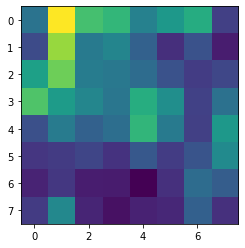

index: 288260
Error: 0.06610917781224307
type                                                         Inst
fill                                                         7447
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 04:46:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7447/...
n_bunches                                                     144
bunch_index                                                   163
bunch_number                                                   27
ts_length                                                   65536
chunk                                                          14
Name: 3703, dtype: object


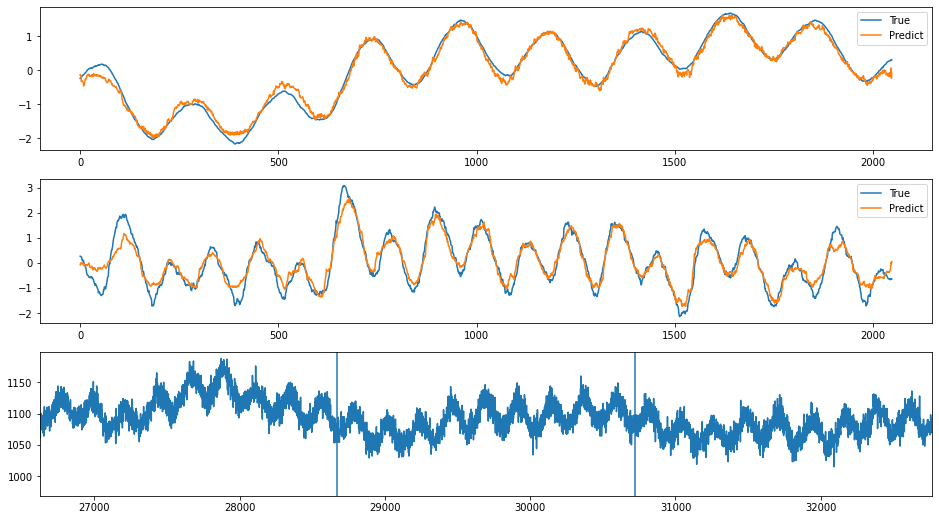

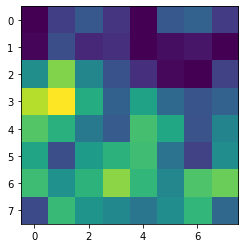

index: 173666
Error: 0.06610918253503924
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 14:12:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                   416
bunch_number                                                  217
ts_length                                                   65536
chunk                                                           9
Name: 2323, dtype: object


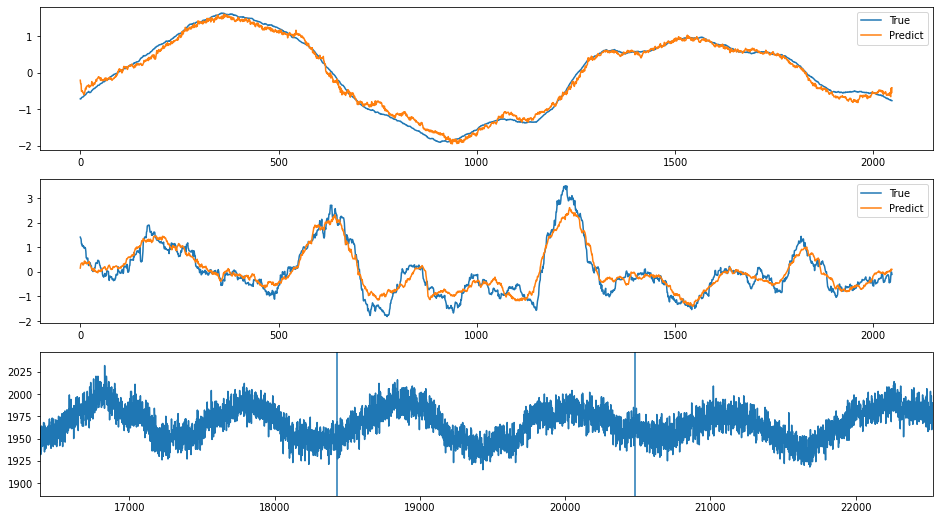

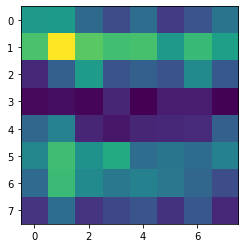

index: 256520
Error: 0.06610920212896366
type                                                         Inst
fill                                                         6457
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 18:36:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6457/...
n_bunches                                                    1020
bunch_index                                                   413
bunch_number                                                  295
ts_length                                                   65536
chunk                                                          24
Name: 6349, dtype: object


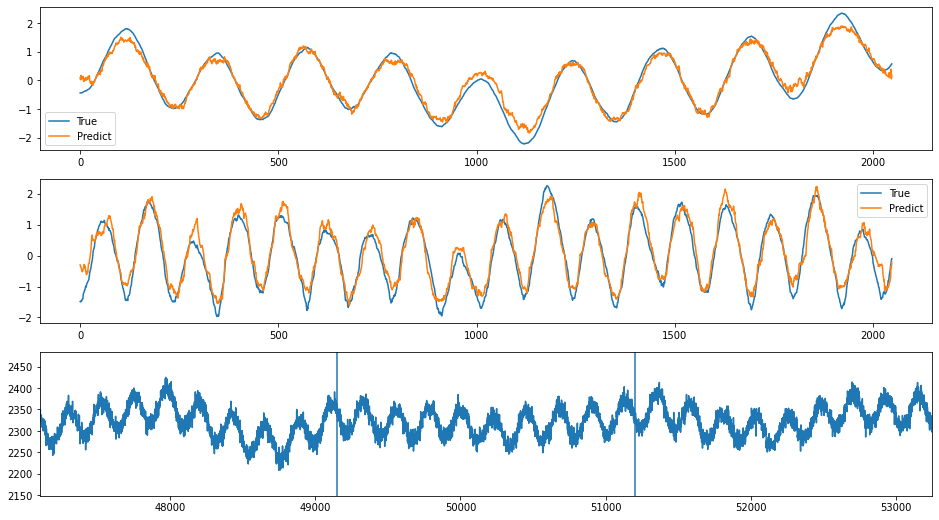

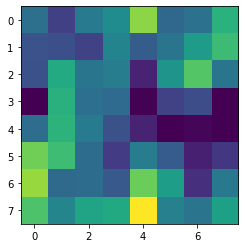

index: 162945
Error: 0.06610811536056713
type                                                         Inst
fill                                                         7239
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-30 12:13:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7239/...
n_bunches                                                     780
bunch_index                                                   426
bunch_number                                                  294
ts_length                                                   65536
chunk                                                          13
Name: 3365, dtype: object


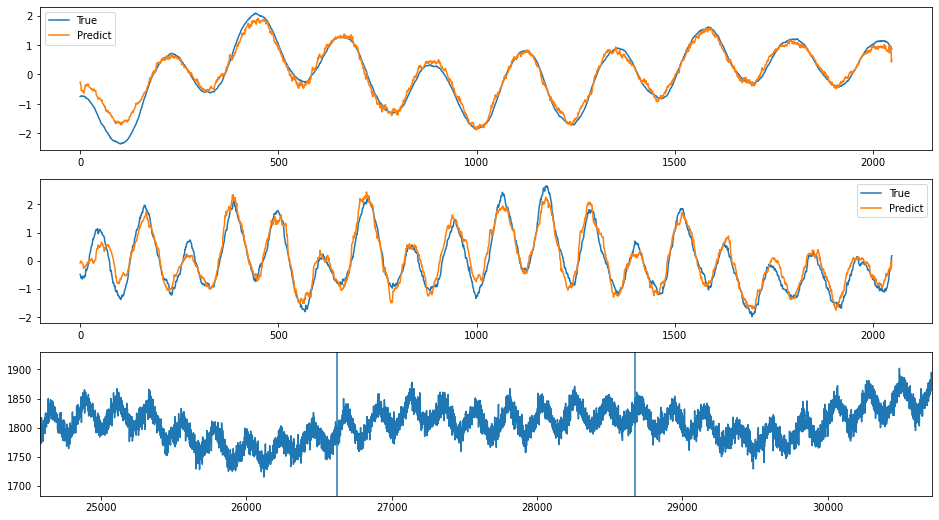

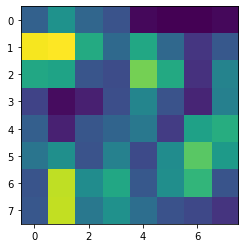

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

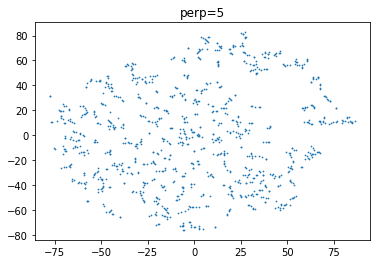

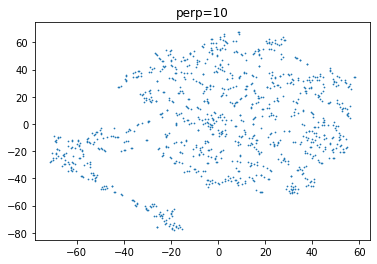

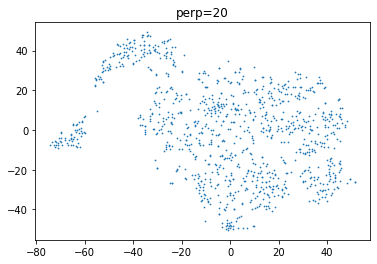

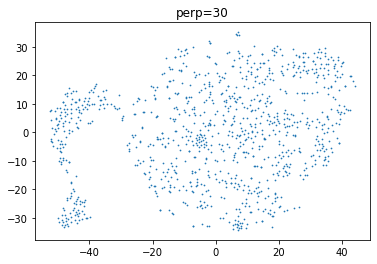

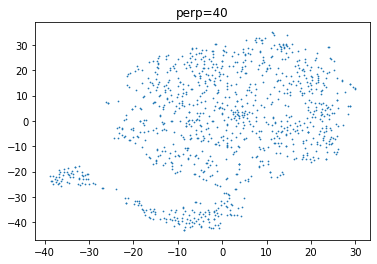

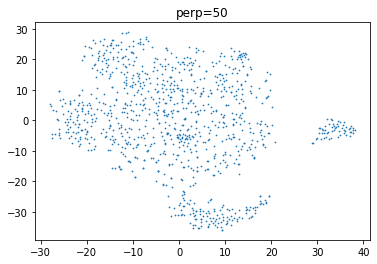

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

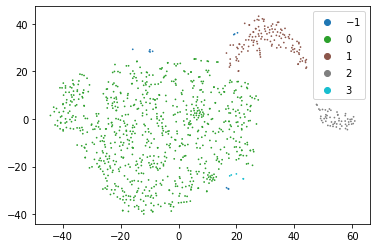

cluster -1
N samples: 11


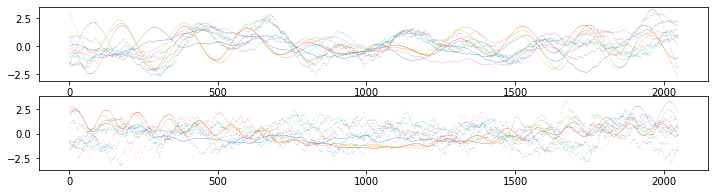

cluster 0
N samples: 822


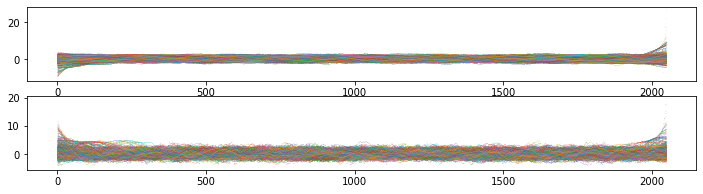

cluster 1
N samples: 130


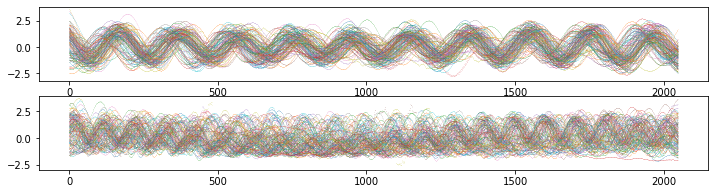

cluster 2
N samples: 56


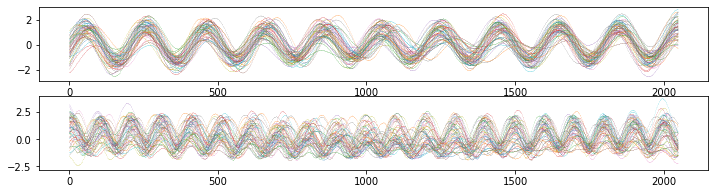

cluster 3
N samples: 5


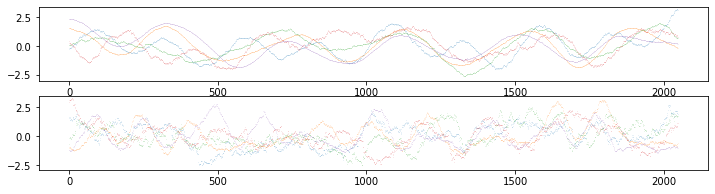

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()